#[ِAnalysis of Car Accidents in Chicago City]

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [137]:
# here put every import you need e.g. import pandas
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geohash2
from shapely.wkt import loads
from shapely.geometry import MultiLineString
from shapely.geometry import Point
import geopandas as gpd
from shapely import wkt
import scipy.stats as stats
import seaborn as sns
import plotly.io as pio
from PIL import Image
from IPython.display import Image, display
from scipy.stats import chi2_contingency
import plotly.graph_objects as go


Download data

In [2]:
crashes_df = pd.read_csv("traffic-crashes.csv")
crashes_vehicles_df = pd.read_csv("traffic-crashes-vehicles.csv")
crashes_people_df = pd.read_csv("traffic-crashes-people.csv")

street_center_lines_df = pd.read_csv("chicago-street-center-lines.csv")
police_beat_boundries_df = pd.read_csv("chicago-police-beat-boundries.csv")
cbd_boundary_df = pd.read_csv("chicago-CBD-boundary.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17832\768101069.py:2: DtypeWarning: Columns (17,19,38,39,40,42,46,47,48,51,53,56,57,58,59,69) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_vehicles_df = pd.read_csv("traffic-crashes-vehicles.csv")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17832\768101069.py:3: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_people_df = pd.read_csv("traffic-crashes-people.csv")


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1]

### first we do a look at our data files 

In [4]:
def disp(df):
    display(df.head())

    print("*"*56)
    print(f"Crashes Shape: {df.shape}")
    print("*"*56)

    info_df = pd.DataFrame()
    info_df['missing_val'] = df.isnull().sum()
    info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100)
    info_df['dtypes'] = df.dtypes
    
    display(info_df)

In [5]:
disp(crashes_df)

CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
2           NO CONTROLS             CLEAR           DAYLIGHT   
3           NO CONTROLS             CLEAR           DAYLIGHT   
4           NO CONTROLS             CLEAR           DAYLIGHT   

       FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  LANE_CNT  \
0              REAR END                            OTHER       NaN   
1  PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)       NaN   
2          PEDALCYCLIST                      NOT DIVIDED       NaN   
3            PEDESTRIAN                          ONE-WAY       NaN   
4          FIXED OBJECT                            OTHER       NaN   

            ALIGNMENT ROADWAY_SURFACE_COND ROAD_DEFECT REPORT_TYPE  \
0  STRAIGHT AND LEVEL                  DRY  NO DEFECTS    ON SCENE   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS    ON SCENE   
2  STRAIGHT AND LEVEL                  DRY  NO DEFECTS    ON SCENE   
3      CURVE ON GRADE                  DRY  NO DEFECTS    ON SCENE   
4  STRAIGHT AND LEVEL                  DRY  NO DEFECTS    ON SCENE   

                         CRASH_TYPE INTERSECTION_RELATED_I NOT_RIGHT_OF_WAY_I  \
0  INJURY AND / OR TOW DUE TO CRASH                    NaN                NaN   
1            NO INJURY / DRIVE AWAY                    NaN                NaN   
2  INJURY AND / OR TOW DUE TO CRASH                    NaN                NaN   
3  INJURY AND / OR TOW DUE TO CRASH                    NaN                NaN   
4            NO INJURY / DRIVE AWAY                    NaN                NaN   

  HIT_AND_RUN_I         DAMAGE    DATE_POLICE_NOTIFIED  \
0           NaN    OVER $1,500  08/18/2023 12:55:00 PM   
1             Y    OVER $1,500  07/29/2023 02:45:00 PM   
2           NaN  $501 - $1,500  08/18/2023 06:01:00 PM   
3           NaN    OVER $1,500  11/26/2019 08:38:00 AM   
4           NaN    OVER $1,500  08/18/2023 10:48:00 AM   

                  PRIM_CONTRIBUTORY_CAUSE  \
0                   FOLLOWING TOO CLOSELY   
1  FAILING TO REDUCE SPEED TO AVOID CRASH   
2  FAILING TO REDUCE SPEED TO AVOID CRASH   
3                     UNABLE TO DETERMINE   
4                   FOLLOWING TOO CLOSELY   

                              SEC_CONTRIBUTORY_CAUSE  STREET_NO  \
0                  DISTRACTION - FROM INSIDE VEHICLE        700   
1  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...       2101   
2                                UNABLE TO DETERMINE       3422   
3                                     NOT APPLICABLE          5   
4                DRIVING SKILLS/KNOWLEDGE/EXPERIENCE          3   

  STREET_DIRECTION  STREET_NAME  BEAT_OF_OCCURRENCE PHOTOS_TAKEN_I  \
0                W     OHARE ST              1654.0            NaN   
1                S  ASHLAND AVE              1235.0            NaN   
2                N     LONG AVE              1633.0            NaN   
3                W  TERMINAL ST              1655.0              Y   
4                W  TERMINAL ST              1653.0            NaN   

  STATE

********************************************************
Crashes Shape: (823957, 47)
********************************************************


missing_val  missing_val_ratio   dtypes
CRASH_RECORD_ID                          0           0.000000   object
CRASH_DATE_EST_I                    762398          92.528858   object
CRASH_DATE                               0           0.000000   object
POSTED_SPEED_LIMIT                       0           0.000000    int64
TRAFFIC_CONTROL_DEVICE                   0           0.000000   object
DEVICE_CONDITION                         0           0.000000   object
WEATHER_CONDITION                        0           0.000000   object
LIGHTING_CONDITION                       0           0.000000   object
FIRST_CRASH_TYPE                         0           0.000000   object
TRAFFICWAY_TYPE                          0           0.000000   object
LANE_CNT                            624947          75.847041  float64
ALIGNMENT                                0           0.000000   object
ROADWAY_SURFACE_COND                     0           0.000000   object
ROAD_DEFECT                              0           0.000000   object
REPORT_TYPE                          24578           2.982923   object
CRASH_TYPE                               0           0.000000   object
INTERSECTION_RELATED_I              635017          77.069192   object
NOT_RIGHT_OF_WAY_I                  785972          95.389929   object
HIT_AND_RUN_I                       565983          68.690842   object
DAMAGE                                   0           0.000000   object
DATE_POLICE_NOTIFIED                     0           0.000000   object
PRIM_CONTRIBUTORY_CAUSE                  0           0.000000   object
SEC_CONTRIBUTORY_CAUSE                   0           0.000000   object
STREET_NO                                0           0.000000    int64
STREET_DIRECTION                         4           0.000485   object
STREET_NAME                              1           0.000121   object
BEAT_OF_OCCURRENCE                       5           0.000607  float64
PHOTOS_TAKEN_I                      813076          98.679421   object
STATEMENTS_TAKEN_I                  805506          97.760684   object
DOORING_I                           821426          99.692824   object
WORK_ZONE_I                         819259          99.429825   object
WORK_ZONE_TYPE                      820323          99.558958   object
WORKERS_PRESENT_I                   822755          99.854119   object
MOST_SEVERE_INJURY                    1812           0.219914   object
INJURIES_TOTAL                        1799           0.218337  float64
INJURIES_FATAL                        1799           0.218337  float64
INJURIES_INCAPACITATING               1799           0.218337  float64
INJURIES_NON_INCAPACITATING           1799           0.218337  float64
INJURIES_REPORTED_NOT_EVIDENT         1799           0.218337  float64
INJURIES_NO_INDICATION                1799           0.218337  float64
INJURIES_UNKNOWN                      1799           0.218337  float64
CRASH_HOUR                               0           0.000000    int64
CRASH_DAY_OF_WEEK                        0           0.000000    int64
CRASH_MONTH                              0           0.000000    int64
LATITUDE                              5690           0.690570  float64
LONGITUDE                             5690           0.690570  float64
LOCATION                              5690           0.690570   object

In [6]:
disp(crashes_vehicles_df)

CRASH_UNIT_ID                                    CRASH_RECORD_ID  \
0        1717556  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...   
1        1717574  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...   
2        1717579  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...   
3        1720118  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   
4        1720119  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   

               CRASH_DATE  UNIT_NO UNIT_TYPE  VEHICLE_ID CMRC_VEH_I      MAKE  \
0  12/06/2023 03:24:00 PM        1    DRIVER   1634931.0        NaN    NISSAN   
1  12/06/2023 04:00:00 PM        2    DRIVER   1634978.0        NaN  CHRYSLER   
2  12/06/2023 04:30:00 PM        1    DRIVER   1634948.0        NaN    SUBARU   
3  12/10/2023 12:12:00 PM        1    DRIVER   1637401.0        NaN    TOYOTA   
4  12/10/2023 12:12:00 PM        2    DRIVER   1637408.0        NaN    SUBARU   

     MODEL LIC_PLATE_STATE  VEHICLE_YEAR VEHICLE_DEFECT VEHICLE_TYPE  \
0   SENTRA              IL        2009.0        UNKNOWN   UNKNOWN/NA   
1  SEBRING              IL        2010.0           NONE    PASSENGER   
2  OUTBACK              IL        2015.0        UNKNOWN    PASSENGER   
3     RAV4              IL        2018.0        UNKNOWN    PASSENGER   
4  OUTBACK              OK        2019.0           NONE    PASSENGER   

  VEHICLE_USE TRAVEL_DIRECTION              MANEUVER TOWED_I FIRE_I  \
0  UNKNOWN/NA                S  SLOW/STOP IN TRAFFIC     NaN    NaN   
1    PERSONAL                S    PASSING/OVERTAKING     NaN    NaN   
2    PERSONAL                W         TURNING RIGHT     NaN    NaN   
3    PERSONAL                E        STRAIGHT AHEAD       Y    NaN   
4    PERSONAL                W        STRAIGHT AHEAD       Y    NaN   

   OCCUPANT_CNT EXCEED_SPEED_LIMIT_I                TOWED_BY TOWED_TO  \
0           1.0                  NaN                     NaN      NaN   
1           1.0                  NaN                     NaN      NaN   
2           1.0                  NaN                     NaN      NaN   
3           1.0                  NaN  streets and sanitation  pound 6   
4           1.0                  NaN                   owner      NaN   

  AREA_00_I AREA_01_I AREA_02_I AREA_03_I AREA_04_I AREA_05_I AREA_06_I  \
0       NaN       NaN         Y       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN         Y         Y         Y       NaN   
2       NaN         Y       NaN       NaN       NaN       NaN       NaN   
3       NaN         Y         Y       NaN       NaN       NaN       NaN   
4       NaN         Y       NaN       NaN       NaN       NaN       NaN   

  AREA_07_I AREA_08_I AREA_09_I AREA_10_I AREA_11_I AREA_12_I AREA_99_I  \
0       NaN       NaN       NaN       NaN       NaN         Y       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN         Y         Y       NaN   
3       NaN       NaN       NaN         Y         Y         Y       NaN   
4       NaN         Y         Y         Y         Y         Y       NaN   

  FIRST_CONTACT_POINT  CMV_ID USDOT_NO CCMC_NO ILCC_NO COMMERCIAL_SRC GVWR  \
0               FRONT     NaN      NaN     NaN     NaN            NaN  NaN   
1   REAR-RIGHT-CORNER     NaN      NaN     NaN     NaN            NaN  NaN   
2               FRONT     NaN      NaN     NaN     NaN            NaN  NaN   
3     SIDE-LEFT-FRONT     NaN      NaN     NaN     NaN            NaN  NaN   
4   FRONT-LEFT-CORNER     NaN      NaN     NaN     NaN            NaN  NaN   

  CARRIER_NAME CARRIER_STATE CARRIER_CITY HAZMAT_PLACARDS_I HAZMAT_NAME UN_NO  \
0          NaN           NaN          NaN               NaN         NaN   NaN   
1          NaN           NaN          NaN               NaN         NaN   NaN   
2          NaN           NaN          NaN               NaN         NaN   NaN   
3          NaN           NaN          NaN               NaN         NaN   NaN   
4          NaN

********************************************************
Crashes Shape: (1680892, 70)
********************************************************


missing_val  missing_val_ratio   dtypes
CRASH_UNIT_ID                       0           0.000000    int64
CRASH_RECORD_ID                     0           0.000000   object
CRASH_DATE                          0           0.000000   object
UNIT_NO                             0           0.000000    int64
UNIT_TYPE                        2150           0.127908   object
VEHICLE_ID                      38473           2.288844  float64
CMRC_VEH_I                    1649615          98.139262   object
MAKE                            38478           2.289142   object
MODEL                           38623           2.297768   object
LIC_PLATE_STATE                188917          11.239092   object
VEHICLE_YEAR                   301958          17.964152  float64
VEHICLE_DEFECT                  38473           2.288844   object
VEHICLE_TYPE                    38473           2.288844   object
VEHICLE_USE                     38473           2.288844   object
TRAVEL_DIRECTION                38473           2.288844   object
MANEUVER                        38473           2.288844   object
TOWED_I                       1472365          87.594265   object
FIRE_I                        1679517          99.918198   object
OCCUPANT_CNT                    38473           2.288844  float64
EXCEED_SPEED_LIMIT_I          1678495          99.857397   object
TOWED_BY                      1524003          90.666325   object
TOWED_TO                      1584546          94.268162   object
AREA_00_I                     1623152          96.564919   object
AREA_01_I                     1231298          73.252654   object
AREA_02_I                     1414448          84.148654   object
AREA_03_I                     1519765          90.414197   object
AREA_04_I                     1520419          90.453105   object
AREA_05_I                     1431572          85.167399   object
AREA_06_I                     1418159          84.369430   object
AREA_07_I                     1437278          85.506862   object
AREA_08_I                     1442051          85.790818   object
AREA_09_I                     1567324          93.243587   object
AREA_10_I                     1515546          90.163199   object
AREA_11_I                     1360731          80.952911   object
AREA_12_I                     1367754          81.370725   object
AREA_99_I                     1491258          88.718252   object
FIRST_CONTACT_POINT             41596           2.474638   object
CMV_ID                        1663792          98.982683  float64
USDOT_NO                      1671286          99.428518   object
CCMC_NO                       1678856          99.878874   object
ILCC_NO                       1679490          99.916592   object
COMMERCIAL_SRC                1669540          99.324644   object
GVWR                          1671366          99.433277   object
CARRIER_NAME                  1664549          99.027719   object
CARRIER_STATE                 1665552          99.087389   object
CARRIER_CITY                  1665846          99.104880   object
HAZMAT_PLACARDS_I             1680562          99.980368   object
HAZMAT_NAME                   1680832          99.996430   object
UN_NO                         1680320          99.965970   object
HAZMAT_PRESENT_I              1668408          99.257299   object
HAZMAT_REPORT_I               1668758          99.278121   object
HAZMAT_REPORT_NO              1680891          99.999941   object
MCS_REPORT_I                  1668709          99.275206   object
MCS_REPORT_NO                 1680885          99.999584   object
HAZMAT_VIO_CAUSE_CRASH_I      1668591          99.268186   object
MCS_VIO_CAUSE_CRASH_I         1668798          99.280501   object
IDOT_PERMIT_NO                1679967          99.944970   object
WIDE_LOAD_I                   1680741          99.991017   object
TRAILER1_WIDTH                1677977          99.826580   object
TRAILER2_WIDTH                1680543          99.979237   object


In [7]:
disp(crashes_people_df)

PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
1   O871921      DRIVER  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   
2    O10018      DRIVER  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...   
3    O10038      DRIVER  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...   
4    O10039      DRIVER  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   
1    827212.0  04/13/2020 10:50:00 PM      NaN  CHICAGO    IL   60620   M   
2      9579.0  11/01/2015 05:00:00 AM      NaN      NaN   NaN     NaN   X   
3      9598.0  11/01/2015 08:00:00 AM      NaN      NaN   NaN     NaN   X   
4      9600.0  11/01/2015 10:15:00 AM      NaN      NaN   NaN     NaN   X   

    AGE DRIVERS_LICENSE_STATE DRIVERS_LICENSE_CLASS  SAFETY_EQUIPMENT  \
0  25.0                    IL                     D      NONE PRESENT   
1  37.0                    IL                   NaN  SAFETY BELT USED   
2   NaN                   NaN                   NaN     USAGE UNKNOWN   
3   NaN                   NaN                   NaN     USAGE UNKNOWN   
4   NaN                   NaN                   NaN     USAGE UNKNOWN   

      AIRBAG_DEPLOYED EJECTION    INJURY_CLASSIFICATION HOSPITAL EMS_AGENCY  \
0  DEPLOYMENT UNKNOWN     NONE  NO INDICATION OF INJURY      NaN        NaN   
1      DID NOT DEPLOY     NONE  NO INDICATION OF INJURY      NaN        NaN   
2  DEPLOYMENT UNKNOWN     NONE  NO INDICATION OF INJURY      NaN        NaN   
3  DEPLOYMENT UNKNOWN  UNKNOWN  NO INDICATION OF INJURY      NaN        NaN   
4  DEPLOYMENT UNKNOWN  UNKNOWN  NO INDICATION OF INJURY      NaN        NaN   

  EMS_RUN_NO     DRIVER_ACTION DRIVER_VISION PHYSICAL_CONDITION  \
0        NaN           UNKNOWN       UNKNOWN            UNKNOWN   
1        NaN              NONE  NOT OBSCURED             NORMAL   
2        NaN  IMPROPER BACKING       UNKNOWN            UNKNOWN   
3        NaN           UNKNOWN       UNKNOWN            UNKNOWN   
4        NaN           UNKNOWN       UNKNOWN            UNKNOWN   

  PEDPEDAL_ACTION PEDPEDAL_VISIBILITY PEDPEDAL_LOCATION        BAC_RESULT  \
0             NaN                 NaN               NaN  TEST NOT OFFERED   
1             NaN                 NaN               NaN  TEST NOT OFFERED   
2             NaN                 NaN               NaN  TEST NOT OFFERED   
3             NaN                 NaN               NaN  TEST NOT OFFERED   
4             NaN                 NaN               NaN  TEST NOT OFFERED   

   BAC_RESULT VALUE CELL_PHONE_USE  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN

********************************************************
Crashes Shape: (1808605, 29)
********************************************************


missing_val  missing_val_ratio   dtypes
PERSON_ID                        0           0.000000   object
PERSON_TYPE                      0           0.000000   object
CRASH_RECORD_ID                  0           0.000000   object
VEHICLE_ID                   36177           2.000271  float64
CRASH_DATE                       0           0.000000   object
SEAT_NO                    1443028          79.786797  float64
CITY                        492062          27.206715   object
STATE                       472632          26.132406   object
ZIPCODE                     600317          33.192267   object
SEX                          29978           1.657521   object
AGE                         527939          29.190398  float64
DRIVERS_LICENSE_STATE       748686          41.395772   object
DRIVERS_LICENSE_CLASS       922585          51.010862   object
SAFETY_EQUIPMENT              5061           0.279829   object
AIRBAG_DEPLOYED              34799           1.924080   object
EJECTION                     22453           1.241454   object
INJURY_CLASSIFICATION          729           0.040307   object
HOSPITAL                   1509447          83.459185   object
EMS_AGENCY                 1623522          89.766533   object
EMS_RUN_NO                 1777884          98.301398   object
DRIVER_ACTION               368819          20.392457   object
DRIVER_VISION               369365          20.422646   object
PHYSICAL_CONDITION          367836          20.338106   object
PEDPEDAL_ACTION            1774170          98.096046   object
PEDPEDAL_VISIBILITY        1774235          98.099640   object
PEDPEDAL_LOCATION          1774172          98.096157   object
BAC_RESULT                  367837          20.338161   object
BAC_RESULT VALUE           1806583          99.888201  float64
CELL_PHONE_USE             1807446          99.935917   object

In [8]:
disp(street_center_lines_df)

the_geom  FNODE_ID  TNODE_ID  \
0  MULTILINESTRING ((-87.63187018232667 41.780809...     10809     16581   
1  MULTILINESTRING ((-87.60548932047061 41.762229...      6501     34082   
2  MULTILINESTRING ((-87.68381848191974 41.697243...     15338     22358   
3  MULTILINESTRING ((-87.645841892972 41.69339840...     15799     28881   
4  MULTILINESTRING ((-87.67053671318457 41.679759...     36407     36534   

   TRANS_ID PRE_DIR     STREET_NAM STREET_TYP SUF_DIR  STREETNAME  L_F_ADD  \
0    127104       S           YALE        AVE     NaN        1782        0   
1    128895       S  COTTAGE GROVE        AVE     NaN        1236     7301   
2    142645       S       CAMPBELL        AVE     NaN        1177    10801   
3    148189       S       SANGAMON         ST     NaN        1696        0   
4    139728       W          118TH         ST     NaN        1823     1933   

   L_T_ADD  R_F_ADD  R_T_ADD  LOGICLF  LOGICLT  LOGICRF  LOGICRT CLASS STATUS  \
0        0     6228     6248        0        0     6228     6248     4      N   
1     7359     7300     7358     7301     7399     7300     7398     2      N   
2    10859    10800    10858    10801    10899    10800    10898     4      N   
3        0    11026    11032        0        0    11026    11032     4      N   
4     1959     1932     1958     1933     1999     1932     1998     4      N   

                     STATUS_DAT TIERED ONEWAY_DIR DIR_TRAVEL   EWNS L_PARITY  \
0  01/01/1999 08:00:00 AM +0000      N          S          F   -232        O   
1  01/01/1999 08:00:00 AM +0000      N        NaN          B      0        O   
2  01/01/1999 08:00:00 AM +0000      N        NaN          B  -2500        O   
3  01/01/1999 08:00:00 AM +0000      N        NaN          B   -932        O   
4  01/01/1999 08:00:00 AM +0000      N        NaN          B -11800        O   

  R_PARITY  F_ZLEV  T_ZLEV  L_FIPS  R_FIPS    R_ZIP    L_ZIP       R_CENSUSBL  \
0        E       0       0   14000   14000  60621.0  60621.0  170316802002035   
1        E       0       0   14000   14000  60619.0  60619.0  170316909002000   
2        E       0       0   14000   14000  60655.0  60655.0  170317503001010   
3        E       0       0   14000   14000  60643.0  60643.0  170317501001010   
4        E       0       0   14000   14000  60643.0  60643.0  170317505003011   

        L_CENSUSBL                 F_CROSS  F_CROSS_ST             T_CROSS  \
0  170316802002035    245|W|ENGLEWOOD|AVE|        2208           6250|S|||   
1  170316908003004          800|E|73RD|ST|         170      800|E|74TH|ST|   
2  170317503001011        2500|W|108TH|ST|        1803    2500|W|109TH|ST|   
3  170317501001011              11024|S|||           0        ||DEAD END||   
4  170317505003010  11800|S|VINCENNES|AVE|        1752  11799|S|CHURCH|ST|   

   T_CROSS_ST      LENGTH  EDIT_DATE EDIT_TYPE FLAG_STRIN EWNS_DIR  \
0           0  220.566014          0       NaN        NaN        W   
1         172  664.774635          0       NaN        NaN      NaN   
2        1805  665.378484          0       NaN        NaN        W   
3           0  152.564889          0       NaN        NaN        W   
4        1214  332.691371          0       NaN        NaN        S   

   EWNS_COORD CREATE_USE                    CREATE_TIM UPDATE_USE  \
0         232   EXISTING  01/01/1999 08:00:00 AM +0000   EXISTING   
1           0   EXISTING  01/01/1999 08:00:00 AM +0000   EXISTING   
2        2500   EXISTING  01/01/1999 08:00:00 AM +0000   EXISTING   
3         932   EXISTING  01/01/1999 08:00:00 AM +0000   EXISTING   
4       11800   EXISTING  01/01/1999 08:00:00 AM +0000   EXISTING   

                     UPDATE_TIM   SHAPE_LEN  
0  01/01/1999 08:00:00 AM +0000  220.566012  
1  01/01/1999 08:00:00 AM +0000  664.774607  
2  01/01/1999 08:00:00 AM +0000  665.378453  
3  01/01/1999 08:00:00 AM +0000  152.564966  
4  01/01/1999 08:00:00 AM +0000  332.691382

********************************************************
Crashes Shape: (55747, 49)
********************************************************


missing_val  missing_val_ratio   dtypes
the_geom              0           0.000000   object
FNODE_ID              0           0.000000    int64
TNODE_ID              0           0.000000    int64
TRANS_ID              0           0.000000    int64
PRE_DIR             454           0.814394   object
STREET_NAM          454           0.814394   object
STREET_TYP         1254           2.249448   object
SUF_DIR           53485          95.942383   object
STREETNAME            0           0.000000    int64
L_F_ADD               0           0.000000    int64
L_T_ADD               0           0.000000    int64
R_F_ADD               0           0.000000    int64
R_T_ADD               0           0.000000    int64
LOGICLF               0           0.000000    int64
LOGICLT               0           0.000000    int64
LOGICRF               0           0.000000    int64
LOGICRT               0           0.000000    int64
CLASS                 0           0.000000   object
STATUS                6           0.010763   object
STATUS_DAT            0           0.000000   object
TIERED                0           0.000000   object
ONEWAY_DIR        36452          65.388272   object
DIR_TRAVEL            0           0.000000   object
EWNS                  0           0.000000    int64
L_PARITY            404           0.724703   object
R_PARITY            404           0.724703   object
F_ZLEV                0           0.000000    int64
T_ZLEV                0           0.000000    int64
L_FIPS                0           0.000000    int64
R_FIPS                0           0.000000    int64
R_ZIP               197           0.353382  float64
L_ZIP               199           0.356970  float64
R_CENSUSBL            0           0.000000    int64
L_CENSUSBL            0           0.000000    int64
F_CROSS               0           0.000000   object
F_CROSS_ST            0           0.000000    int64
T_CROSS               0           0.000000   object
T_CROSS_ST            0           0.000000    int64
LENGTH                0           0.000000  float64
EDIT_DATE             0           0.000000    int64
EDIT_TYPE         48661          87.289002   object
FLAG_STRIN        55192          99.004431   object
EWNS_DIR           7779          13.954114   object
EWNS_COORD            0           0.000000    int64
CREATE_USE            0           0.000000   object
CREATE_TIM            0           0.000000   object
UPDATE_USE            0           0.000000   object
UPDATE_TIM            0           0.000000   object
SHAPE_LEN             0           0.000000  float64

In [9]:
disp(police_beat_boundries_df)

the_geom  DISTRICT  SECTOR  BEAT  \
0  MULTIPOLYGON (((-87.7047252651434 41.975774430...        17       1     1   
1  MULTIPOLYGON (((-87.83365455041093 41.97535481...        31       0     0   
2  MULTIPOLYGON (((-87.90684167275818 41.97656175...        16       5     5   
3  MULTIPOLYGON (((-87.64491798475646 41.96972709...        19       1     1   
4  MULTIPOLYGON (((-87.63724132684592 41.96598776...        19       1     1   

   BEAT_NUM  
0      1713  
1      3100  
2      1651  
3      1914  
4      1915

********************************************************
Crashes Shape: (277, 5)
********************************************************


missing_val  missing_val_ratio  dtypes
the_geom            0                0.0  object
DISTRICT            0                0.0   int64
SECTOR              0                0.0   int64
BEAT                0                0.0   int64
BEAT_NUM            0                0.0   int64

In [10]:
disp(cbd_boundary_df)

the_geom  OBJECTID      SUM_AREA  \
0  MULTIPOLYGON (((-87.62405822532047 41.90406015...         1  1.045633e+08   

                        NAME  AREA  LEN    SHAPE_AREA     SHAPE_LEN  
0  Central Business District     0    0  1.122806e+08  61725.295967

********************************************************
Crashes Shape: (1, 8)
********************************************************


missing_val  missing_val_ratio   dtypes
the_geom              0                0.0   object
OBJECTID              0                0.0    int64
SUM_AREA              0                0.0  float64
NAME                  0                0.0   object
AREA                  0                0.0    int64
LEN                   0                0.0    int64
SHAPE_AREA            0                0.0  float64
SHAPE_LEN             0                0.0  float64

In [11]:
crashes_df = crashes_df[['CRASH_RECORD_ID', 
                           #'CRASH_DATE_EST_I', 
                           'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 
                         #'LANE_CNT', 
                         'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE','INTERSECTION_RELATED_I',
       #'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
                         'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       #'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       #'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 
                         'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION']].copy()

crashes_vehicles_df = crashes_vehicles_df[['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 
                                           #'CMRC_VEH_I',
                                           'MAKE', 'MODEL',
       'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 
                                           #'TOWED_I', 'FIRE_I',
       'OCCUPANT_CNT',
                                           #'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO',
       #'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I',
       #'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I',
       #'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 
                                           #'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       #'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       #'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       #'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       #'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       #'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       #'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
       #'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG',
       #'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
       #'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS'
                                          ]].copy()

crashes_people_df = crashes_people_df[['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', #'SEAT_NO',
                                       # 'CITY', 'STATE', 'ZIPCODE', 
                                       'SEX', 'AGE',
       # 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
                                       'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', #'EJECTION',
                                       'INJURY_CLASSIFICATION', #'HOSPITAL',
       #'EMS_AGENCY', 'EMS_RUN_NO', 
                                       'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', #'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       #'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       #'CELL_PHONE_USE'
                                      ]].copy()

street_center_lines_df = street_center_lines_df[['the_geom', 'FNODE_ID', 'TNODE_ID', 'TRANS_ID', 'PRE_DIR', 'STREET_NAM',
       'STREET_TYP', 
                                                 #'SUF_DIR', 
        'STREETNAME', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD',
       'R_T_ADD', 'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT', 'CLASS',
       'STATUS', 'STATUS_DAT', 'TIERED', 
                                                 #'ONEWAY_DIR',
        'DIR_TRAVEL', 'EWNS',
       'L_PARITY', 'R_PARITY', 'F_ZLEV', 'T_ZLEV', 'L_FIPS', 'R_FIPS', 'R_ZIP',
       'L_ZIP', 'R_CENSUSBL', 'L_CENSUSBL', 'F_CROSS', 'F_CROSS_ST', 'T_CROSS',
       'T_CROSS_ST', 'LENGTH', 'EDIT_DATE', #'EDIT_TYPE', 'FLAG_STRIN',
       # 'EWNS_DIR', 
                                                 'EWNS_COORD', 'CREATE_USE', 'CREATE_TIM', 'UPDATE_USE',
       'UPDATE_TIM', 'SHAPE_LEN']]

crashes_df = crashes_df.drop_duplicates()
crashes_vehicles_df = crashes_vehicles_df.drop_duplicates()
crashes_people_df = crashes_people_df.drop_duplicates()
street_center_lines_df = street_center_lines_df.drop_duplicates()
police_beat_boundries_df = police_beat_boundries_df.drop_duplicates()
cbd_boundary_df = cbd_boundary_df.drop_duplicates()

Here we delete the columns that Have a high value of missing values and that don't appear to be useful for the homework, and we also drop duplicat rows.                    

### [2]

### second we start filling the missing data

#### crashes_df

In [12]:
# REPORT_TYPE Filling using CRASH_DATE & DATE_POLICE_NOTIFIED

# Convert date columns to datetime
crashes_df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'], errors='coerce')
crashes_df['CRASH_DATE'] = pd.to_datetime(crashes_df['CRASH_DATE'], errors='coerce')

# Function to fill missing values in REPORT_TYPE based on date comparison
def determine_report_type(row):
    if pd.isnull(row['REPORT_TYPE']):
        return 'ON SCENE' if row['DATE_POLICE_NOTIFIED'] == row['CRASH_DATE'] else 'NOT ON SCENE (DESK REPORT)'
    return row['REPORT_TYPE']

# Apply the function to fill the REPORT_TYPE column
crashes_df['REPORT_TYPE'] = crashes_df.apply(determine_report_type, axis=1)

In [13]:
# INTERSECTION_RELATED_I Filling using Trafficway Type

# Define a set of intersection types
intersection_types = {'T-INTERSECTION','UNKNOWN INTERSECTION TYPE','L-INTERSECTION','Y-INTERSECTION','CENTER TURN LANE'}

# Function to update INTERSECTION_RELATED_I based on TRAFFICWAY_TYPE
def is_intersection_related(row):
    return 'Y' if row['TRAFFICWAY_TYPE'] in intersection_types else 'N'

# Apply the function to the dataframe
crashes_df['INTERSECTION_RELATED_I'] = crashes_df.apply(lambda row: is_intersection_related(row), axis=1)

In [14]:
# Beat_of_occurencd filling using Street_Name

# Define a function to fill BEAT_OF_OCCURRENCE based on the mode of related groups
def fill_beat_of_occurrence(row, mode_per_street):
    if pd.isnull(row['BEAT_OF_OCCURRENCE']):
        street = row['STREET_NAME']
        return mode_per_street.get(street, row['BEAT_OF_OCCURRENCE'])
    return row['BEAT_OF_OCCURRENCE']

# Calculate the mode of BEAT_OF_OCCURRENCE for each STREET_NAME
mode_per_street = (crashes_df
                   .groupby('STREET_NAME')['BEAT_OF_OCCURRENCE']
                   .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else mode_beat)
                   .to_dict())

# Apply the function to fill missing BEAT_OF_OCCURRENCE
crashes_df['BEAT_OF_OCCURRENCE'] = crashes_df.apply(lambda row: fill_beat_of_occurrence(row, mode_per_street), axis=1)

# Convert BEAT_OF_OCCURRENCE to integers, coercing errors and filling with NaNs
crashes_df['BEAT_OF_OCCURRENCE'] = pd.to_numeric(crashes_df['BEAT_OF_OCCURRENCE'], errors='coerce').astype('Int64')

In [15]:
# Street_Direction Filling using Street_Name

# Define the mapping of street names to directions
street_direction_mapping = {"BESSIE COLEMAN DR": "N","UNKNOWN": "UNKNOWN","DOTY AVE W": "S","SOUTH CHICAGO AVE": "S"}

# Function to update STREET_DIRECTION based on the mapping
def update_street_direction(row, mapping):
    if pd.isnull(row['STREET_DIRECTION']):
        return mapping.get(row['STREET_NAME'], row['STREET_DIRECTION'])
    return row['STREET_DIRECTION']

# Apply the function to update the STREET_DIRECTION column
crashes_df['STREET_DIRECTION'] = crashes_df.apply(lambda row: update_street_direction(row, street_direction_mapping), axis=1)

In [16]:
# Filling Latitude,Longitude & Location using the_geom

# Convert STREET_NAME to uppercase and strip whitespace to ensure consistency
crashes_df['STREET_NAME'] = crashes_df['STREET_NAME'].str.upper().str.strip()

# Calculate median LATITUDE and LONGITUDE for each STREET_NAME
median_coords = crashes_df.groupby('STREET_NAME')[['LATITUDE', 'LONGITUDE']].median().to_dict('index')

# Define a function to fill missing LATITUDE and LONGITUDE based on median values of the same street name
def fill_lat_long(row):
    if pd.isna(row['LATITUDE']) or pd.isna(row['LONGITUDE']):
        median_coord = median_coords.get(row['STREET_NAME'])
        if median_coord:
            return pd.Series([median_coord['LATITUDE'], median_coord['LONGITUDE']])
    return pd.Series([row['LATITUDE'], row['LONGITUDE']])

# Apply the function to fill missing LATITUDE and LONGITUDE
crashes_df[['LATITUDE', 'LONGITUDE']] = crashes_df.apply(fill_lat_long, axis=1)

# Define a function to create the LOCATION from LATITUDE and LONGITUDE
def create_location(row):
    if pd.notna(row['LATITUDE']) and pd.notna(row['LONGITUDE']):
        return f"POINT ({row['LONGITUDE']} {row['LATITUDE']})"
    return 'Unknown'

# Apply the function to create the LOCATION column
crashes_df['LOCATION'] = crashes_df.apply(create_location, axis=1)

# Fill remaining missing values with 'Unknown'
crashes_df['LATITUDE']=crashes_df['LATITUDE'].fillna('Unknown')
crashes_df['LONGITUDE'] =crashes_df['LONGITUDE'].fillna('Unknown')


In [17]:
# STREET_NAME dropping 
crashes_df = crashes_df.dropna(subset=['STREET_NAME'])

In [18]:
# Most_Severe_Injury nan dropping
crashes_df.dropna(subset=['MOST_SEVERE_INJURY'], inplace=True)

# changing these columns to int64
crashes_df['INJURIES_TOTAL'] = pd.to_numeric(crashes_df['INJURIES_TOTAL'], errors='coerce').astype('Int64')
crashes_df['INJURIES_FATAL'] = pd.to_numeric(crashes_df['INJURIES_FATAL'], errors='coerce').astype('Int64')
crashes_df['INJURIES_INCAPACITATING'] = pd.to_numeric(crashes_df['INJURIES_INCAPACITATING'], errors='coerce').astype('Int64')
crashes_df['INJURIES_NON_INCAPACITATING'] = pd.to_numeric(crashes_df['INJURIES_NON_INCAPACITATING'], errors='coerce').astype('Int64')
crashes_df['INJURIES_REPORTED_NOT_EVIDENT'] = pd.to_numeric(crashes_df['INJURIES_REPORTED_NOT_EVIDENT'], errors='coerce').astype('Int64')
crashes_df['INJURIES_NO_INDICATION'] = pd.to_numeric(crashes_df['INJURIES_NO_INDICATION'], errors='coerce').astype('Int64')
crashes_df['INJURIES_UNKNOWN'] = pd.to_numeric(crashes_df['INJURIES_UNKNOWN'], errors='coerce').astype('Int64')
# we notic after dropping that all the injures column that have nan values get droped

#### crashes_vehicles_df

In [19]:
# here we drop the rows that don't have VEHICLE_ID
crashes_vehicles_df.dropna(subset=['VEHICLE_ID'], inplace=True)

# we notice after we have done that, that many other nan values in other columns are alos droped and some like MAKE and MODEL have very few nan values left so we will also drop them
crashes_vehicles_df.dropna(subset=['MAKE'], inplace=True)
crashes_vehicles_df.dropna(subset=['MODEL'], inplace=True)

# we also notice the UNIT_TYPE has only  19 values that are nan we could drop them or fill them with the mode 
mode_value = crashes_vehicles_df['UNIT_TYPE'].mode()[0]
crashes_vehicles_df['UNIT_TYPE'] = crashes_vehicles_df['UNIT_TYPE'].fillna(mode_value)

In [20]:
# Convert 'CRASH_DATE' to datetime and extract year
crashes_vehicles_df['CRASH_DATE'] = pd.to_datetime(crashes_vehicles_df['CRASH_DATE'], errors='coerce')
crashes_vehicles_df['CRASH_YEAR'] = crashes_vehicles_df['CRASH_DATE'].dt.year

# Define the current year
current_year = 2024

# Apply the logic for 'VEHICLE_YEAR'
def adjust_vehicle_year(row):
    if row['VEHICLE_YEAR'] > 1:
        return min(row['VEHICLE_YEAR'], current_year, row['CRASH_YEAR'])
    return row['VEHICLE_YEAR']

crashes_vehicles_df['VEHICLE_YEAR'] = crashes_vehicles_df.apply(adjust_vehicle_year, axis=1)

# Calculate the average 'VEHICLE_YEAR' for each 'MAKE' and 'MODEL'
average_years = crashes_vehicles_df.groupby(['MAKE', 'MODEL'])['VEHICLE_YEAR'].mean().reset_index()
average_years.rename(columns={'VEHICLE_YEAR': 'AVERAGE_VEHICLE_YEAR'}, inplace=True)

# Merge the averages back into the original DataFrame
crashes_vehicles_df = crashes_vehicles_df.merge(average_years, on=['MAKE', 'MODEL'], how='left')

# Fill invalid 'VEHICLE_YEAR' values with the averages
crashes_vehicles_df['VEHICLE_YEAR'] = crashes_vehicles_df['VEHICLE_YEAR'].fillna(0)
invalid_years = (crashes_vehicles_df['VEHICLE_YEAR'] > current_year) | (crashes_vehicles_df['VEHICLE_YEAR'] == 0+
crashes_vehicles_df.loc[invalid_years, 'VEHICLE_YEAR'] = crashes_vehicles_df.loc[invalid_years, 'AVERAGE_VEHICLE_YEAR']

# Drop rows with missing 'VEHICLE_YEAR' values
crashes_vehicles_df.dropna(subset=['VEHICLE_YEAR'], inplace=True)

# Convert 'VEHICLE_YEAR' to integers
crashes_vehicles_df['VEHICLE_YEAR'] = crashes_vehicles_df['VEHICLE_YEAR'].round().astype(int)

# Drop unnecessary columns
crashes_vehicles_df.drop(columns=['AVERAGE_VEHICLE_YEAR'], inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17832\995052621.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crashes_vehicles_df['CRASH_DATE'] = pd.to_datetime(crashes_vehicles_df['CRASH_DATE'], errors='coerce')


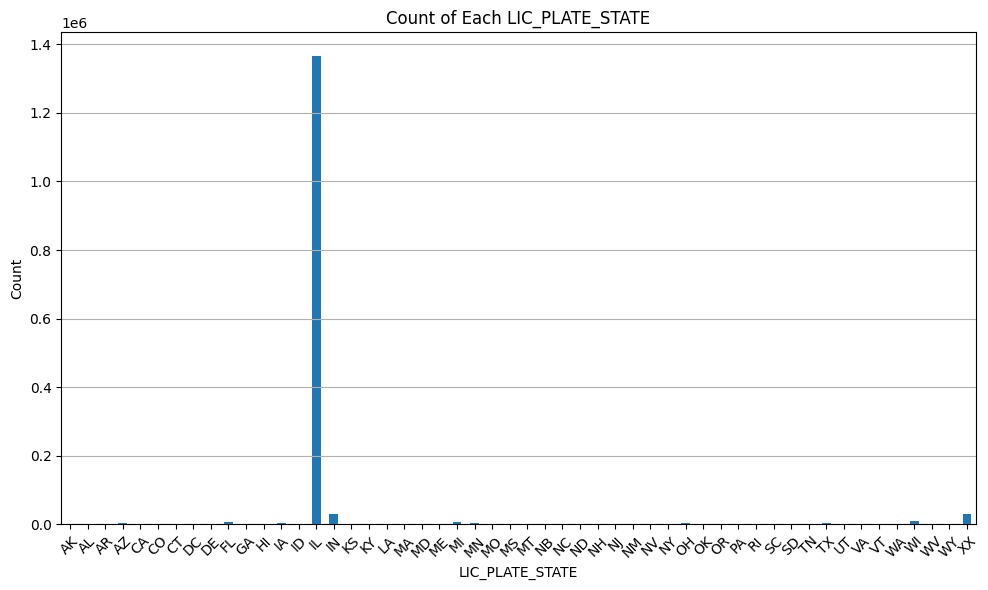

In [21]:
counts = crashes_vehicles_df['LIC_PLATE_STATE'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Count of Each LIC_PLATE_STATE')
plt.xlabel('LIC_PLATE_STATE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

crashes_vehicles_df = crashes_vehicles_df.drop('LIC_PLATE_STATE',axis=1)
# here we notice that the vast majority of LIC_PLATE_STATE is of one kind so here so here we will drop the column

In [22]:
# filling the nan in FIRST_CONTACT_POINT with the mode 
mode_value = crashes_vehicles_df['FIRST_CONTACT_POINT'].mode()[0]
crashes_vehicles_df['FIRST_CONTACT_POINT'] = crashes_vehicles_df['FIRST_CONTACT_POINT'].fillna(mode_value)

In [23]:
# finaly here we change the float and int32 to int64
crashes_vehicles_df[['VEHICLE_ID', 'VEHICLE_YEAR', 'OCCUPANT_CNT']] = crashes_vehicles_df[['VEHICLE_ID', 'VEHICLE_YEAR', 'OCCUPANT_CNT']].astype('int64')

#### crashes_people_df

In [24]:
# here we drop the rows that have nan VEHICLE_ID in them
crashes_people_df.dropna(subset=['VEHICLE_ID'], inplace=True)

# we see that after we have dropped the rows with nan VEHICLE_ID , SAFETY_EQUIPMENT, AIRBAG_DEPLOYED, INJURY_CLASSIFICATION have very small values so we could drop them or fill them with the mode
mode_value = crashes_people_df['SAFETY_EQUIPMENT'].mode()[0]
crashes_people_df['SAFETY_EQUIPMENT'] = crashes_people_df['SAFETY_EQUIPMENT'].fillna(mode_value)

mode_value = crashes_people_df['AIRBAG_DEPLOYED'].mode()[0]
crashes_people_df['AIRBAG_DEPLOYED'] = crashes_people_df['AIRBAG_DEPLOYED'].fillna(mode_value)

mode_value = crashes_people_df['INJURY_CLASSIFICATION'].mode()[0]
crashes_people_df['INJURY_CLASSIFICATION'] = crashes_people_df['INJURY_CLASSIFICATION'].fillna(mode_value)

In [25]:
# here we fill the nan values in PHYSICAL_CONDITION, DRIVER_VISION, DRIVER_ACTION with "UNKNOWN"
crashes_people_df['DRIVER_ACTION'] = crashes_people_df['DRIVER_ACTION'].fillna('Unknown')
crashes_people_df['DRIVER_VISION'] = crashes_people_df['DRIVER_VISION'].fillna('Unknown')
crashes_people_df['PHYSICAL_CONDITION'] = crashes_people_df['PHYSICAL_CONDITION'].fillna('Unknown')

In [26]:
# SEX Refill using PERSON_TYPE column 

# Calculate the most frequent 'SEX' for each 'PERSON_TYPE'
most_frequent_sex = crashes_people_df.groupby('PERSON_TYPE')['SEX'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')

# Fill missing 'SEX' values using the most frequent 'SEX' for the corresponding 'PERSON_TYPE'
crashes_people_df['SEX'] = crashes_people_df.apply(
    lambda row: most_frequent_sex[row['PERSON_TYPE']] if pd.isna(row['SEX']) else row['SEX'],
    axis=1
)

In [27]:
# AGE filling using PERSON_TYPE & SEX 

# Clean the 'AGE' column by setting invalid ages to None
crashes_people_df['AGE'] = crashes_people_df['AGE'].apply(lambda x: x if 0 <= x <= 110 else None)

# Calculate the average 'AGE' for each combination of 'PERSON_TYPE' and 'SEX'
average_age = crashes_people_df.groupby(['PERSON_TYPE', 'SEX'])['AGE'].mean()

# Function to fill missing 'AGE' values using the average age for the corresponding 'PERSON_TYPE' and 'SEX'
def fill_age(row):
    if pd.isna(row['AGE']):
        person_type = row['PERSON_TYPE']
        sex = row['SEX']
        if pd.notna(person_type) and pd.notna(sex):
            if (person_type, sex) in average_age.index:
                return average_age.loc[(person_type, sex)]
            elif (person_type, 'X') in average_age.index:
                return average_age.loc[(person_type, 'X')]
    return row['AGE']

# Apply the function to fill missing 'AGE' values
crashes_people_df['AGE'] = crashes_people_df.apply(lambda row: fill_age(row), axis=1)

# Calculate the average age for 'SEX' = 'X' across all 'PERSON_TYPE'
average_age_X = average_age.xs('X', level='SEX').mean()

# Function to fill remaining missing 'AGE' values with the average age for 'SEX' = 'X'
def fill_remaining_age(row):
    if pd.isna(row['AGE']):
        return average_age_X
    return row['AGE']

# Apply the function to fill remaining missing 'AGE' values
crashes_people_df['AGE'] = crashes_people_df.apply(lambda row: fill_remaining_age(row), axis=1)

In [28]:
# change CRASH_DATE to datetime and AGE, VEHICLE_ID to int64
crashes_people_df['CRASH_DATE'] = pd.to_datetime(crashes_people_df['CRASH_DATE'], errors='coerce')
crashes_people_df[['VEHICLE_ID', 'AGE']] = crashes_people_df[['VEHICLE_ID', 'AGE']].astype('int64')

#### street_center_lines_df

In [29]:
# dropping the rows when both STREET_NAM and STREET_TYP are nan
street_center_lines_df = street_center_lines_df.dropna(subset=['STREET_NAM', 'STREET_TYP'], how='all')

In [30]:
# filling the nan values in STATUS, L_PARITY, R_PARITY, R_ZIP, L_ZIP with the mode 
mode_value = street_center_lines_df['STATUS'].mode()[0]
street_center_lines_df['STATUS'] = street_center_lines_df['STATUS'].fillna(mode_value)
mode_value = street_center_lines_df['L_PARITY'].mode()[0]
street_center_lines_df['L_PARITY'] = street_center_lines_df['L_PARITY'].fillna(mode_value)
mode_value = street_center_lines_df['R_PARITY'].mode()[0]
street_center_lines_df['R_PARITY'] = street_center_lines_df['R_PARITY'].fillna(mode_value)
mode_value = street_center_lines_df['R_ZIP'].mode()[0]
street_center_lines_df['R_ZIP'] = street_center_lines_df['R_ZIP'].fillna(mode_value)
mode_value = street_center_lines_df['L_ZIP'].mode()[0]
street_center_lines_df['L_ZIP'] = street_center_lines_df['L_ZIP'].fillna(mode_value)

In [31]:
# filling the remaining nan values in STREET_TYP with the mode
mode_value = street_center_lines_df['STREET_TYP'].mode()[0]
street_center_lines_df['STREET_TYP'] = street_center_lines_df['STREET_TYP'].fillna(mode_value)

# Saving the cleaned data to csv

In [32]:
# crashes_df.to_csv('cleaned_data\cleaned_crashes.csv',index = False)
# crashes_vehicles_df.to_csv('cleaned_data\cleaned_vehicles.csv',index = False)
# crashes_people_df.to_csv('cleaned_data\cleaned_people.csv',index = False)
# street_center_lines_df.to_csv('cleaned_data\cleaned_street.csv',index = False)
# police_beat_boundries_df.to_csv("cleaned_data\cleaned_police_beat.csv", index = False)
# cbd_boundary_df.to_csv("cleaned_data\cleaned_CBD.csv", index = False)

# Reading the cleaned data

In [33]:
# crashes_df = pd.read_csv('cleaned_data\cleaned_crashes.csv')
# crashes_vehicles_df = pd.read_csv('cleaned_data\cleaned_vehicles.csv')
# crashes_people_df = pd.read_csv('cleaned_data\cleaned_people.csv')

# street_center_lines_df = pd.read_csv('cleaned_data\cleaned_street.csv')
# police_beat_boundries_df = pd.read_csv("cleaned_data\cleaned_police_beat.csv")
# cbd_boundary_df = pd.read_csv("cleaned_data\cleaned_CBD.csv")

# [b] From Raw to Information

### [i]


In [35]:
# extracting year from the date
crashes_df['CRASH_YEAR'] = crashes_df['CRASH_DATE'].dt.year

### [ii]

In [36]:
# استبعاد السائقين لحساب عدد الركاب فقط
passengers_df = crashes_people_df[crashes_people_df['PERSON_TYPE'] != 'DRIVER']
 
# حساب عدد الركاب لكل مركبة في كل حادث
passenger_counts = passengers_df.groupby(['CRASH_RECORD_ID', 'VEHICLE_ID']).size().reset_index(name='PASSENGER_COUNT')
 
# حساب متوسط عدد الركاب ومتوسط عمر الراكب لكل حادث مروري
average_passengers_per_crash = passenger_counts.groupby('CRASH_RECORD_ID')['PASSENGER_COUNT'].mean().reset_index(name='AVERAGE_PASSENGER_COUNT')
average_age_per_crash = passengers_df.groupby('CRASH_RECORD_ID')['AGE'].mean().reset_index(name='AVERAGE_PASSENGER_AGE')
 
passengers_df = passengers_df.merge(average_passengers_per_crash, on='CRASH_RECORD_ID', how='left')
passengers_df = passengers_df.merge(average_age_per_crash, on='CRASH_RECORD_ID', how='left')

In [38]:
disp(passengers_df)

PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   P114359   PASSENGER  7e27bf3caa1b66715bfbdd9fd8525f64565dfe1caeb070...   
1    P11436   PASSENGER  9db57c36ac4e31e60e72ebc546ecd95cd0631bc07b10ea...   
2   P360313   PASSENGER  5ea3857354ac3be0dead3ce760649a319a1f73951e5afc...   
3   P360314   PASSENGER  32b9afb3f12ed5ecc58927d121243655d18ace2a4fa6e6...   
4   P114360   PASSENGER  b119fc395ec3a3292f031e88df7e72d533bc132b2989d0...   

   VEHICLE_ID          CRASH_DATE SEX  AGE  SAFETY_EQUIPMENT AIRBAG_DEPLOYED  \
0      486598 2018-10-27 12:59:00   M   18  SAFETY BELT USED  DID NOT DEPLOY   
1       56541 2016-07-13 08:20:00   F    0  SAFETY BELT USED  DID NOT DEPLOY   
2     1549452 2023-07-29 18:50:00   M   26  SAFETY BELT USED  DID NOT DEPLOY   
3     1549455 2023-07-29 19:10:00   F   51     USAGE UNKNOWN  DID NOT DEPLOY   
4      486601 2018-10-27 09:33:00   M   26  SAFETY BELT USED  DID NOT DEPLOY   

     INJURY_CLASSIFICATION DRIVER_ACTION DRIVER_VISION PHYSICAL_CONDITION  \
0  NO INDICATION OF INJURY       Unknown       Unknown            Unknown   
1  NO INDICATION OF INJURY       Unknown       Unknown            Unknown   
2  NO INDICATION OF INJURY       Unknown       Unknown            Unknown   
3    REPORTED, NOT EVIDENT       Unknown       Unknown            Unknown   
4  NO INDICATION OF INJURY       Unknown       Unknown            Unknown   

   AVERAGE_PASSENGER_COUNT  AVERAGE_PASSENGER_AGE  
0                      1.0                   18.0  
1                      2.0                    7.0  
2                      2.5                   21.6  
3                      1.0                   51.0  
4                      1.0                   26.0

********************************************************
Crashes Shape: (365746, 15)
********************************************************


missing_val  missing_val_ratio          dtypes
PERSON_ID                          0                0.0          object
PERSON_TYPE                        0                0.0          object
CRASH_RECORD_ID                    0                0.0          object
VEHICLE_ID                         0                0.0           int64
CRASH_DATE                         0                0.0  datetime64[ns]
SEX                                0                0.0          object
AGE                                0                0.0           int64
SAFETY_EQUIPMENT                   0                0.0          object
AIRBAG_DEPLOYED                    0                0.0          object
INJURY_CLASSIFICATION              0                0.0          object
DRIVER_ACTION                      0                0.0          object
DRIVER_VISION                      0                0.0          object
PHYSICAL_CONDITION                 0                0.0          object
AVERAGE_PASSENGER_COUNT            0                0.0         float64
AVERAGE_PASSENGER_AGE              0                0.0         float64

### [iii]

In [39]:
# حساب عدد المركبات لكل حادث مروري باستخدام عمود CRASH_RECORD_ID
vehicle_counts = crashes_vehicles_df.groupby('CRASH_RECORD_ID').size().reset_index(name='VEHICLE_COUNT')

# دمج عدد المركبات مع جدول الحوادث المرورية
crashes_df = crashes_df.merge(vehicle_counts, on='CRASH_RECORD_ID', how='left')

mean_vehicle_count = crashes_df['VEHICLE_COUNT'].mean()
crashes_df['VEHICLE_COUNT'] = crashes_df['VEHICLE_COUNT'].fillna(mean_vehicle_count)

### [iv]

In [40]:
# Define a function to categorize vehicle age
def categorize_vehicle_age(row):
    age = row['CRASH_YEAR'] - row['VEHICLE_YEAR']
    if age >= 30:
        return 'Ancient'
    elif 10 <= age < 30:
        return 'Old'
    else:
        return 'New'

# Apply the function to create a new column for vehicle age category
crashes_vehicles_df['VEHICLE_AGE_CATEGORY'] = crashes_vehicles_df.apply(lambda row: categorize_vehicle_age(row), axis=1)

# Create a multi-categorical column for vehicle age categories
vehicle_age_categories = crashes_vehicles_df.groupby('CRASH_RECORD_ID')['VEHICLE_AGE_CATEGORY'] \
                                             .apply(lambda x: ', '.join(x.unique())) \
                                             .reset_index(name='VEHICLE_AGE_CATEGORIES')

# Merge the results back into the original dataframe
crashes_vehicles_df = crashes_vehicles_df.merge(vehicle_age_categories, on='CRASH_RECORD_ID', how='left')

### [v]

In [41]:
# Define a function to calculate vehicle age
def calculate_vehicle_age(row):
    return row['CRASH_YEAR'] - row['VEHICLE_YEAR']

# Apply the function to get the vehicle age
crashes_vehicles_df['VEHICLE_AGE'] = crashes_vehicles_df.apply(lambda row: calculate_vehicle_age(row), axis=1)

# Define the bins and labels for categorizing vehicle age
bins = [0, 10, 30, crashes_vehicles_df['VEHICLE_AGE'].max() + 1]
labels = ['New', 'Old', 'Ancient']

# Categorize the vehicle age using pd.cut
crashes_vehicles_df['VEHICLE_AGE_BINNED'] = pd.cut(crashes_vehicles_df['VEHICLE_AGE'], bins=bins, labels=labels, right=False)

# Convert categorical values to string
crashes_vehicles_df['VEHICLE_AGE_BINNED'] = crashes_vehicles_df['VEHICLE_AGE_BINNED'].astype(str)

# Create a multi-categorical column for vehicle age categories
vehicle_age_categories_binned = crashes_vehicles_df.groupby('CRASH_RECORD_ID')['VEHICLE_AGE_BINNED'] \
    .apply(lambda x: ', '.join(x.unique())) \
    .reset_index(name='VEHICLE_AGE_CATEGORIES_BINNED')

# Merge the results back into the original DataFrame
crashes_vehicles_df = crashes_vehicles_df.merge(vehicle_age_categories_binned, on='CRASH_RECORD_ID', how='left')


### [vi]

In [42]:
# Define a function to convert geographic coordinates to Geohash
def geohash_location(lat, lon, precision):
    return geohash2.encode(lat, lon, precision)

# Remove rows with 'Unknown' values in 'LATITUDE' and 'LONGITUDE'
crashes_df = crashes_df[~crashes_df['LATITUDE'].eq('Unknown') & ~crashes_df['LONGITUDE'].eq('Unknown')]

# Convert 'LATITUDE' and 'LONGITUDE' columns to numeric type
crashes_df['LATITUDE'] = pd.to_numeric(crashes_df['LATITUDE'], errors='coerce')
crashes_df['LONGITUDE'] = pd.to_numeric(crashes_df['LONGITUDE'], errors='coerce')

# Drop rows with invalid (NaN) values after conversion
crashes_df = crashes_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Set the precision level for Geohash
precision = 7  

# Apply the Geohash conversion function to the DataFrame
crashes_df['GEOHASH'] = crashes_df.apply(lambda row: geohash_location(row['LATITUDE'], row['LONGITUDE'], precision), axis=1)

# Display the results
crashes_df[['LATITUDE', 'LONGITUDE', 'GEOHASH']].head()

LATITUDE  LONGITUDE  GEOHASH
0  41.976201 -87.905309  dp3qz9t
1  41.854120 -87.665902  dp3wj57
2  41.942976 -87.761883  dp3wdgm
5  41.899312 -87.632768  dp3wmge
7  41.706629 -87.663301  dp3tm0m

### [vii]

In [43]:
# Calculate the number of crashes in each geographic sector (Geohash)
geohash_counts = crashes_df['GEOHASH'].value_counts().to_frame().reset_index()
geohash_counts.columns = ['GEOHASH', 'COUNT']

# Display the number of crashes in each Geohash
print(geohash_counts.head())

# Determine the thresholds for the three categories based on the distribution of crash counts
threshold_red = geohash_counts['COUNT'].quantile(0.67)
threshold_yellow = geohash_counts['COUNT'].quantile(0.33)

# Function to classify Geohashes into the three categories
def classify_geohash(count, red_thresh, yellow_thresh):
    if count >= red_thresh:
        return 'Red'
    elif count >= yellow_thresh:
        return 'Yellow'
    else:
        return 'Gray'

# Apply classification to the data
geohash_counts['CATEGORY'] = geohash_counts['COUNT'].apply(classify_geohash, args=(threshold_red, threshold_yellow))

# Merge the classifications back with the original data
# Ensure this is only run once
crashes_df = crashes_df.merge(geohash_counts[['GEOHASH', 'COUNT', 'CATEGORY']], on='GEOHASH', how='left')

   GEOHASH  COUNT
0  dp3qz9t   2047
1  dp3tqgq   1101
2  dp3wq5v   1091
3  dp3twbt    847
4  dp3wq5p    837


In [44]:
geohash_counts.head()

GEOHASH  COUNT CATEGORY
0  dp3qz9t   2047      Red
1  dp3tqgq   1101      Red
2  dp3wq5v   1091      Red
3  dp3twbt    847      Red
4  dp3wq5p    837      Red

### [viii]

In [45]:
# Convert the_geom to geometries
street_center_lines_df['geometry'] = street_center_lines_df['the_geom'].apply(loads)

# Function to calculate geohash for a geometry
def calculate_geohash(geometry, precision=7):
    if isinstance(geometry, MultiLineString):
        centroid = geometry.centroid
        return geohash2.encode(centroid.y, centroid.x, precision=precision)
    return None

# Apply the function to the geometry column
street_center_lines_df['GEOHASH'] = street_center_lines_df['geometry'].apply(calculate_geohash)

In [46]:
# Ensure 'SHAPE_LEN' is numeric
street_center_lines_df['SHAPE_LEN'] = pd.to_numeric(street_center_lines_df['SHAPE_LEN'], errors='coerce')

# Convert length from miles to kilometers
street_center_lines_df['LENGTH_KM'] = street_center_lines_df['SHAPE_LEN'] * 0.0003048

# Check the max value of LENGTH_KM to set appropriate bins
max_length_km = street_center_lines_df['LENGTH_KM'].max()

# Perform binning into three categories: Short, Medium, Long
bins = [0, 0.15, 0.4, max_length_km + 0.01]  
labels = ['Short', 'Medium', 'Long']
street_center_lines_df['LENGTH_CATEGORY'] = pd.cut(street_center_lines_df['LENGTH_KM'], bins=bins, labels=labels, right=False, include_lowest=True)

# Display the distribution of categories
print(street_center_lines_df['LENGTH_CATEGORY'].value_counts())
print(street_center_lines_df['LENGTH_CATEGORY'].unique())

# Create the new DataFrame with required columns
new_df = street_center_lines_df[['GEOHASH', 'LENGTH_KM', 'LENGTH_CATEGORY']]


# Keep only the necessary columns
new_df = new_df[['GEOHASH', 'LENGTH_KM', 'LENGTH_CATEGORY']]

# Merge with crashes_df
crashes_df = crashes_df.merge(new_df, on='GEOHASH', how='left')

LENGTH_CATEGORY
Short     36558
Medium    18581
Long        154
Name: count, dtype: int64
['Short', 'Medium', 'Long']
Categories (3, object): ['Short' < 'Medium' < 'Long']


In [48]:
disp(crashes_df)

CRASH_RECORD_ID          CRASH_DATE  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479... 2023-08-18 12:50:00   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 2023-07-29 14:45:00   
2  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 2023-07-29 14:45:00   
3  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c... 2023-08-18 17:58:00   
4  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c... 2023-08-18 17:58:00   

   POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
0                  15                  OTHER  FUNCTIONING PROPERLY   
1                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
2                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
3                  30            NO CONTROLS           NO CONTROLS   
4                  30            NO CONTROLS           NO CONTROLS   

  WEATHER_CONDITION LIGHTING_CONDITION      FIRST_CRASH_TYPE  \
0             CLEAR           DAYLIGHT              REAR END   
1             CLEAR           DAYLIGHT  PARKED MOTOR VEHICLE   
2             CLEAR           DAYLIGHT  PARKED MOTOR VEHICLE   
3             CLEAR           DAYLIGHT          PEDALCYCLIST   
4             CLEAR           DAYLIGHT          PEDALCYCLIST   

                   TRAFFICWAY_TYPE           ALIGNMENT ROADWAY_SURFACE_COND  \
0                            OTHER  STRAIGHT AND LEVEL                  DRY   
1  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL                  DRY   
2  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL                  DRY   
3                      NOT DIVIDED  STRAIGHT AND LEVEL                  DRY   
4                      NOT DIVIDED  STRAIGHT AND LEVEL                  DRY   

  ROAD_DEFECT REPORT_TYPE                        CRASH_TYPE  \
0  NO DEFECTS    ON SCENE  INJURY AND / OR TOW DUE TO CRASH   
1  NO DEFECTS    ON SCENE            NO INJURY / DRIVE AWAY   
2  NO DEFECTS    ON SCENE            NO INJURY / DRIVE AWAY   
3  NO DEFECTS    ON SCENE  INJURY AND / OR TOW DUE TO CRASH   
4  NO DEFECTS    ON SCENE  INJURY AND / OR TOW DUE TO CRASH   

  INTERSECTION_RELATED_I         DAMAGE DATE_POLICE_NOTIFIED  \
0                      N    OVER $1,500  2023-08-18 12:55:00   
1                      N    OVER $1,500  2023-07-29 14:45:00   
2                      N    OVER $1,500  2023-07-29 14:45:00   
3                      N  $501 - $1,500  2023-08-18 18:01:00   
4                      N  $501 - $1,500  2023-08-18 18:01:00   

                  PRIM_CONTRIBUTORY_CAUSE  \
0                   FOLLOWING TOO CLOSELY   
1  FAILING TO REDUCE SPEED TO AVOID CRASH   
2  FAILING TO REDUCE SPEED TO AVOID CRASH   
3  FAILING TO REDUCE SPEED TO AVOID CRASH   
4  FAILING TO REDUCE SPEED TO AVOID CRASH   

                              SEC_CONTRIBUTORY_CAUSE  STREET_NO  \
0                  DISTRACTION - FROM INSIDE VEHICLE        700   
1  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...       2101   
2  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...       2101   
3                                UNABLE TO DETERMINE       3422   
4                                UNABLE TO DETERMINE       3422   

  STREET_DIRECTION  STREET_NAME  BEAT_OF_OCCURRENCE        MOST_SEVERE_INJURY  \
0                W     OHARE ST                1654  NONINCAPACITATING INJURY   
1                S  ASHLAND AVE                1235   NO INDICATION OF INJURY   
2                S  ASHLAND AVE                1235   NO INDICATION OF INJURY   
3                N     LONG AVE                1633  NONINCAPACITATING INJURY   
4                N     LONG AVE                1633  NONINCAPACITATING INJURY   

   INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
0               1               0                        0   
1               0               0                        0   
2               0               0                        0   
3               1               0                        0   
4               1               0                        0   

 

********************************************************
Crashes Shape: (2081434, 44)
********************************************************


missing_val  missing_val_ratio          dtypes
CRASH_RECORD_ID                          0           0.000000          object
CRASH_DATE                               0           0.000000  datetime64[ns]
POSTED_SPEED_LIMIT                       0           0.000000           int64
TRAFFIC_CONTROL_DEVICE                   0           0.000000          object
DEVICE_CONDITION                         0           0.000000          object
WEATHER_CONDITION                        0           0.000000          object
LIGHTING_CONDITION                       0           0.000000          object
FIRST_CRASH_TYPE                         0           0.000000          object
TRAFFICWAY_TYPE                          0           0.000000          object
ALIGNMENT                                0           0.000000          object
ROADWAY_SURFACE_COND                     0           0.000000          object
ROAD_DEFECT                              0           0.000000          object
REPORT_TYPE                              0           0.000000          object
CRASH_TYPE                               0           0.000000          object
INTERSECTION_RELATED_I                   0           0.000000          object
DAMAGE                                   0           0.000000          object
DATE_POLICE_NOTIFIED                     0           0.000000  datetime64[ns]
PRIM_CONTRIBUTORY_CAUSE                  0           0.000000          object
SEC_CONTRIBUTORY_CAUSE                   0           0.000000          object
STREET_NO                                0           0.000000           int64
STREET_DIRECTION                         0           0.000000          object
STREET_NAME                              0           0.000000          object
BEAT_OF_OCCURRENCE                       0           0.000000           Int64
MOST_SEVERE_INJURY                       0           0.000000          object
INJURIES_TOTAL                           0           0.000000           Int64
INJURIES_FATAL                           0           0.000000           Int64
INJURIES_INCAPACITATING                  0           0.000000           Int64
INJURIES_NON_INCAPACITATING              0           0.000000           Int64
INJURIES_REPORTED_NOT_EVIDENT            0           0.000000           Int64
INJURIES_NO_INDICATION                   0           0.000000           Int64
INJURIES_UNKNOWN                         0           0.000000           Int64
CRASH_HOUR                               0           0.000000           int64
CRASH_DAY_OF_WEEK                        0           0.000000           int64
CRASH_MONTH                              0           0.000000           int64
LATITUDE                                 0           0.000000         float64
LONGITUDE                                0           0.000000         float64
LOCATION                                 0           0.000000          object
CRASH_YEAR                               0           0.000000           int32
VEHICLE_COUNT                            0           0.000000         float64
GEOHASH                                  0           0.000000          object
COUNT                                    0           0.000000           int64
CATEGORY                                 0           0.000000          object
LENGTH_KM                            21206           1.018817         float64
LENGTH_CATEGORY                      21206           1.018817        category

In [49]:
#dropping duplicates and resetting the index
crashes_df.drop_duplicates(subset=['CRASH_RECORD_ID'], inplace=True)
crashes_df.reset_index(drop=True, inplace=True)

In [50]:
disp(crashes_df)

CRASH_RECORD_ID          CRASH_DATE  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479... 2023-08-18 12:50:00   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 2023-07-29 14:45:00   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c... 2023-08-18 17:58:00   
3  b236c77d59e32b7b469a6e2f17f438b7457e1bd8bc689b... 2023-07-29 13:00:00   
4  0e208d23344f0d1b3a9fcd4bb07676a750ddb73c397b5c... 2023-08-13 13:30:00   

   POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
0                  15                  OTHER  FUNCTIONING PROPERLY   
1                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
2                  30            NO CONTROLS           NO CONTROLS   
3                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
4                  35            NO CONTROLS  FUNCTIONING PROPERLY   

  WEATHER_CONDITION LIGHTING_CONDITION      FIRST_CRASH_TYPE  \
0             CLEAR           DAYLIGHT              REAR END   
1             CLEAR           DAYLIGHT  PARKED MOTOR VEHICLE   
2             CLEAR           DAYLIGHT          PEDALCYCLIST   
3             CLEAR           DAYLIGHT               TURNING   
4             CLEAR           DAYLIGHT                 ANGLE   

                   TRAFFICWAY_TYPE           ALIGNMENT ROADWAY_SURFACE_COND  \
0                            OTHER  STRAIGHT AND LEVEL                  DRY   
1  DIVIDED - W/MEDIAN (NOT RAISED)  STRAIGHT AND LEVEL                  DRY   
2                      NOT DIVIDED  STRAIGHT AND LEVEL                  DRY   
3                      NOT DIVIDED  STRAIGHT AND LEVEL              UNKNOWN   
4                            OTHER  STRAIGHT AND LEVEL                  DRY   

  ROAD_DEFECT                 REPORT_TYPE                        CRASH_TYPE  \
0  NO DEFECTS                    ON SCENE  INJURY AND / OR TOW DUE TO CRASH   
1  NO DEFECTS                    ON SCENE            NO INJURY / DRIVE AWAY   
2  NO DEFECTS                    ON SCENE  INJURY AND / OR TOW DUE TO CRASH   
3     UNKNOWN  NOT ON SCENE (DESK REPORT)            NO INJURY / DRIVE AWAY   
4  NO DEFECTS  NOT ON SCENE (DESK REPORT)            NO INJURY / DRIVE AWAY   

  INTERSECTION_RELATED_I         DAMAGE DATE_POLICE_NOTIFIED  \
0                      N    OVER $1,500  2023-08-18 12:55:00   
1                      N    OVER $1,500  2023-07-29 14:45:00   
2                      N  $501 - $1,500  2023-08-18 18:01:00   
3                      N  $501 - $1,500  2023-07-29 13:46:00   
4                      N    OVER $1,500  2023-08-13 19:40:00   

                  PRIM_CONTRIBUTORY_CAUSE  \
0                   FOLLOWING TOO CLOSELY   
1  FAILING TO REDUCE SPEED TO AVOID CRASH   
2  FAILING TO REDUCE SPEED TO AVOID CRASH   
3                     UNABLE TO DETERMINE   
4                        IMPROPER BACKING   

                              SEC_CONTRIBUTORY_CAUSE  STREET_NO  \
0                  DISTRACTION - FROM INSIDE VEHICLE        700   
1  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...       2101   
2                                UNABLE TO DETERMINE       3422   
3                                UNABLE TO DETERMINE       1732   
4                                UNABLE TO DETERMINE       9000   

  STREET_DIRECTION   STREET_NAME  BEAT_OF_OCCURRENCE  \
0                W      OHARE ST                1654   
1                S   ASHLAND AVE                1235   
2                N      LONG AVE                1633   
3                N   LA SALLE DR                1814   
4                S  PROSPECT AVE                2221   

         MOST_SEVERE_INJURY  INJURIES_TOTAL  INJURIES_FATAL  \
0  NONINCAPACITATING INJURY               1               0   
1   NO INDICATION OF INJURY               0               0   
2  NONINCAPACITATING INJURY               1               0   
3   NO INDICATION OF INJURY               0               0   
4   NO INDICATION OF INJURY               0               0   

   INJURIES_INCAPACITATING  INJURIES_NON_INCAPACI

********************************************************
Crashes Shape: (819922, 44)
********************************************************


missing_val  missing_val_ratio          dtypes
CRASH_RECORD_ID                          0           0.000000          object
CRASH_DATE                               0           0.000000  datetime64[ns]
POSTED_SPEED_LIMIT                       0           0.000000           int64
TRAFFIC_CONTROL_DEVICE                   0           0.000000          object
DEVICE_CONDITION                         0           0.000000          object
WEATHER_CONDITION                        0           0.000000          object
LIGHTING_CONDITION                       0           0.000000          object
FIRST_CRASH_TYPE                         0           0.000000          object
TRAFFICWAY_TYPE                          0           0.000000          object
ALIGNMENT                                0           0.000000          object
ROADWAY_SURFACE_COND                     0           0.000000          object
ROAD_DEFECT                              0           0.000000          object
REPORT_TYPE                              0           0.000000          object
CRASH_TYPE                               0           0.000000          object
INTERSECTION_RELATED_I                   0           0.000000          object
DAMAGE                                   0           0.000000          object
DATE_POLICE_NOTIFIED                     0           0.000000  datetime64[ns]
PRIM_CONTRIBUTORY_CAUSE                  0           0.000000          object
SEC_CONTRIBUTORY_CAUSE                   0           0.000000          object
STREET_NO                                0           0.000000           int64
STREET_DIRECTION                         0           0.000000          object
STREET_NAME                              0           0.000000          object
BEAT_OF_OCCURRENCE                       0           0.000000           Int64
MOST_SEVERE_INJURY                       0           0.000000          object
INJURIES_TOTAL                           0           0.000000           Int64
INJURIES_FATAL                           0           0.000000           Int64
INJURIES_INCAPACITATING                  0           0.000000           Int64
INJURIES_NON_INCAPACITATING              0           0.000000           Int64
INJURIES_REPORTED_NOT_EVIDENT            0           0.000000           Int64
INJURIES_NO_INDICATION                   0           0.000000           Int64
INJURIES_UNKNOWN                         0           0.000000           Int64
CRASH_HOUR                               0           0.000000           int64
CRASH_DAY_OF_WEEK                        0           0.000000           int64
CRASH_MONTH                              0           0.000000           int64
LATITUDE                                 0           0.000000         float64
LONGITUDE                                0           0.000000         float64
LOCATION                                 0           0.000000          object
CRASH_YEAR                               0           0.000000           int32
VEHICLE_COUNT                            0           0.000000         float64
GEOHASH                                  0           0.000000          object
COUNT                                    0           0.000000           int64
CATEGORY                                 0           0.000000          object
LENGTH_KM                            21206           2.586344         float64
LENGTH_CATEGORY                      21206           2.586344        category

### [ix]

In [51]:
# Check if the required columns are present
if not all(col in crashes_df.columns for col in ['LONGITUDE', 'LATITUDE']):
    raise ValueError("Missing data: 'LONGITUDE' and 'LATITUDE' columns are not present in crashes data")

# Convert crashes data to GeoDataFrame, dropping missing values
crashes_df = crashes_df.dropna(subset=['LONGITUDE', 'LATITUDE'])
crashes_gdf = gpd.GeoDataFrame(
    crashes_df,
    geometry=gpd.points_from_xy(crashes_df['LONGITUDE'], crashes_df['LATITUDE']),
    crs="EPSG:4326"
)

# Check if the 'the_geom' column is present and valid
if 'the_geom' not in cbd_boundary_df.columns:
    raise ValueError("Missing data: 'the_geom' column is not present in CBD boundary data")

# Convert 'the_geom' column to geometry objects
cbd_boundary_df['geometry'] = cbd_boundary_df['the_geom'].apply(wkt.loads)

# Convert the boundary to a GeoDataFrame
cbd_gdf = gpd.GeoDataFrame(cbd_boundary_df, geometry='geometry', crs="EPSG:4326")

# Project to EPSG:6933
crashes_gdf = crashes_gdf.to_crs(epsg=6933)
cbd_gdf = cbd_gdf.to_crs(epsg=6933)

# Calculate the distance from each crash to the CBD polygon
crashes_gdf['DISTANCE_TO_CBD'] = crashes_gdf.geometry.apply(lambda x: cbd_gdf.geometry.distance(x).min())

# Ensure no missing values in distance calculation
if crashes_gdf['DISTANCE_TO_CBD'].isnull().any():
    raise ValueError("There are missing values in the distance to CBD calculation")

# Bin distances into three categories: Close, Medium, Far
bins = [0, 2000, 5000, crashes_gdf['DISTANCE_TO_CBD'].max() + 0.01]  # distances in meters
labels = ['Close', 'Medium', 'Far']
crashes_gdf['DISTANCE_CATEGORY'] = pd.cut(crashes_gdf['DISTANCE_TO_CBD'], bins=bins, labels=labels, right=False)

# Add the new columns to the original DataFrame
crashes_df['DISTANCE_TO_CBD'] = crashes_gdf['DISTANCE_TO_CBD']
crashes_df['DISTANCE_CATEGORY'] = crashes_gdf['DISTANCE_CATEGORY']

# Display the distribution of categories
print(crashes_df['DISTANCE_CATEGORY'].value_counts())

# Display the results
print(crashes_df[['LATITUDE', 'LONGITUDE', 'DISTANCE_TO_CBD', 'DISTANCE_CATEGORY']].head())


DISTANCE_CATEGORY
Far       599416
Close     125572
Medium     94934
Name: count, dtype: int64
    LATITUDE  LONGITUDE  DISTANCE_TO_CBD DISTANCE_CATEGORY
0  41.976201 -87.905309     25977.386219               Far
1  41.854120 -87.665902      2200.455111            Medium
2  41.942976 -87.761883     11861.698621               Far
3  41.899312 -87.632768         0.000000             Close
4  41.706629 -87.663301     15430.004450               Far


### [x]

In [52]:
# Perform Binarization
crashes_df['WITHIN_CBD'] = crashes_df['DISTANCE_CATEGORY'].map({'Close':'in', 'Medium': 'out', 'Far': 'out'})

# Display the distribution of categories
within_cbd_counts = crashes_df['WITHIN_CBD'].value_counts()
print(within_cbd_counts)

# Display the results
results = crashes_df[['LATITUDE', 'LONGITUDE', 'DISTANCE_TO_CBD', 'DISTANCE_CATEGORY', 'WITHIN_CBD']].head()
print(results)

WITHIN_CBD
out    694350
in     125572
Name: count, dtype: int64
    LATITUDE  LONGITUDE  DISTANCE_TO_CBD DISTANCE_CATEGORY WITHIN_CBD
0  41.976201 -87.905309     25977.386219               Far        out
1  41.854120 -87.665902      2200.455111            Medium        out
2  41.942976 -87.761883     11861.698621               Far        out
3  41.899312 -87.632768         0.000000             Close         in
4  41.706629 -87.663301     15430.004450               Far        out


### [xi]

In [53]:
# Convert crash data to GeoDataFrame, dropping missing values
crashes_df = crashes_df.dropna(subset=['LONGITUDE', 'LATITUDE'])
crashes_gdf = gpd.GeoDataFrame(
    crashes_df,
    geometry=gpd.points_from_xy(crashes_df['LONGITUDE'], crashes_df['LATITUDE']),
    crs="EPSG:4326"
)

# Convert 'the_geom' column to geometry objects
police_beat_boundries_df['geometry'] = police_beat_boundries_df['the_geom'].apply(wkt.loads)
police_districts_gdf = gpd.GeoDataFrame(police_beat_boundries_df, geometry='geometry', crs="EPSG:4326")

# Ensure the coordinate reference systems (CRS) match
police_districts_gdf = police_districts_gdf.to_crs(crashes_gdf.crs)

# Perform a spatial join to link crashes to police districts
crashes_with_districts_gdf = gpd.sjoin(crashes_gdf, police_districts_gdf[['geometry', 'DISTRICT']], how='left', predicate='within')

# Extract police district names or IDs
crashes_df['POLICE_DISTRICT'] = crashes_with_districts_gdf['DISTRICT']

# Display results
results = crashes_df[['CRASH_RECORD_ID', 'LATITUDE', 'LONGITUDE', 'POLICE_DISTRICT']].head()
print(results)


                                     CRASH_RECORD_ID   LATITUDE  LONGITUDE  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...  41.976201 -87.905309   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...  41.854120 -87.665902   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...  41.942976 -87.761883   
3  b236c77d59e32b7b469a6e2f17f438b7457e1bd8bc689b...  41.899312 -87.632768   
4  0e208d23344f0d1b3a9fcd4bb07676a750ddb73c397b5c...  41.706629 -87.663301   

   POLICE_DISTRICT  
0             16.0  
1             12.0  
2             16.0  
3             18.0  
4             22.0  


### [xii]

# Question [2]: Data Analysis and Information Discovery

## [a] Traffic Accidents Causes


### [i]

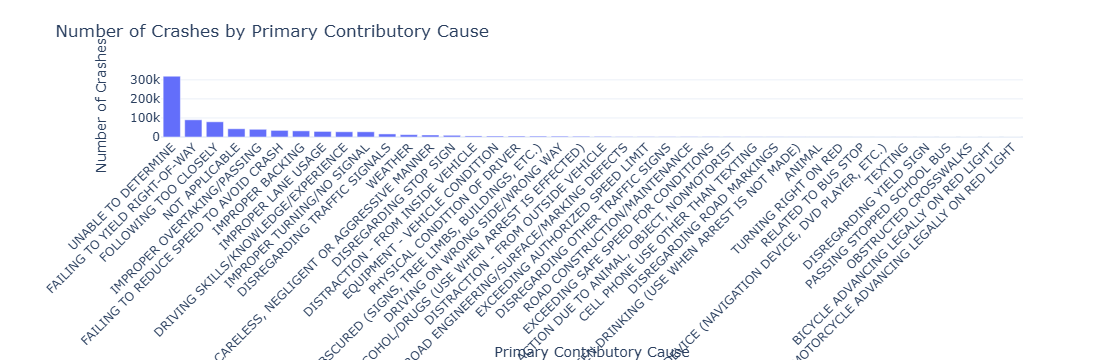

In [55]:
crash_counts = crashes_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().reset_index()
crash_counts.columns = ['PRIM_CONTRIBUTORY_CAUSE', 'Number of Crashes']

# Plotting the bar chart with Plotly
fig = px.bar(crash_counts, 
             x='PRIM_CONTRIBUTORY_CAUSE', 
             y='Number of Crashes',
             title='Number of Crashes by Primary Contributory Cause',
             labels={'PRIM_CONTRIBUTORY_CAUSE': 'Primary Contributory Cause', 'Number of Crashes': 'Number of Crashes'},
             template='plotly_white')

fig.update_layout(xaxis_tickangle=-45)  # Rotate x labels for better readability
fig.show()

The bar chart shows the number of crashes categorized by their primary contributory causes. 
The most frequent cause, “UNABLE TO DETERMINE,” accounts for over 300,000 crashes, indicating a significant number of incidents where the cause could not be identified. 
Other major causes include “FAILING TO YIELD RIGHT-OF-WAY,” “FOLLOWING TOO CLOSELY,” and “FAILING TO REDUCE SPEED TO AVOID CRASH,” each contributing to a substantial number of crashes. 
The chart highlights that driver behaviors such as not yielding, tailgating, and speeding are leading factors in crashes.

### [ii]

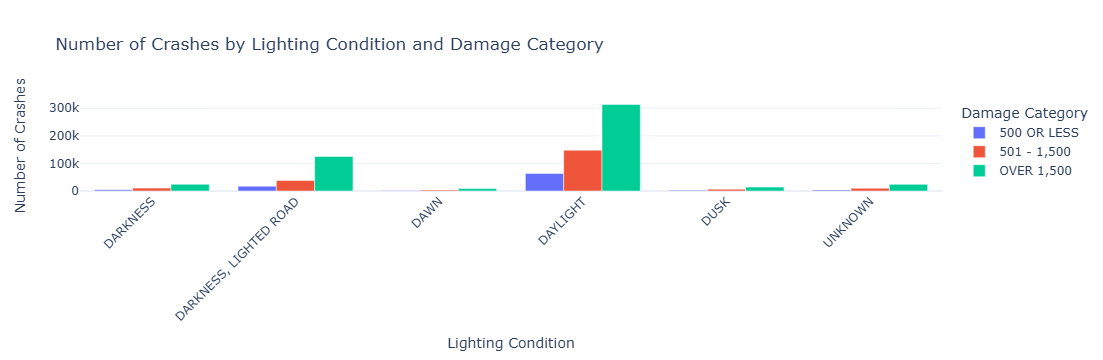

In [56]:
crashes_df['DAMAGE'] = crashes_df['DAMAGE'].str.replace('$', '') # because $ is making issues 
lighting_damage_counts = crashes_df.groupby(['LIGHTING_CONDITION', 'DAMAGE']).size().reset_index(name='Number of Crashes')

# Plotting the bar chart with Plotly
fig = px.bar(lighting_damage_counts, 
             x='LIGHTING_CONDITION', 
             y='Number of Crashes', 
             color='DAMAGE',
             title='Number of Crashes by Lighting Condition and Damage Category',
             labels={'LIGHTING_CONDITION': 'Lighting Condition', 'Number of Crashes': 'Number of Crashes', 'DAMAGE': 'Damage Category'},
             barmode='group',
             template='plotly_white')

fig.update_layout(xaxis_tickangle=-45)  # Rotate x labels for better readability
fig.show()

we notice here that in all Lighting cases the damage is alwasy more over 1500$. we also see that most of the crashes happend at DAYLIGHT and DARKNESS, LIGHTED ROAD
which could be explaind that most people are driving in those times

### [iii]

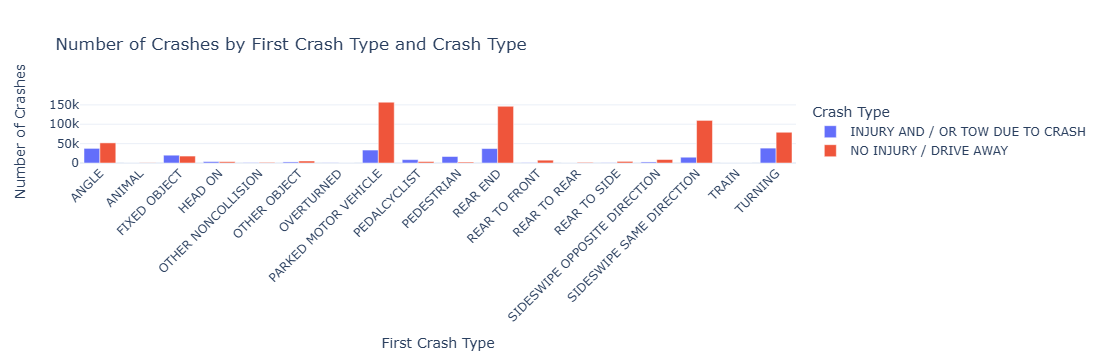

In [57]:
# Grouping by 'CRASH_TYPE' and 'FIRST_CRASH_TYPE' and counting the number of crashes
combined_counts = crashes_df.groupby([ 'FIRST_CRASH_TYPE','CRASH_TYPE']).size().reset_index(name='Number of Crashes')

# Plotting the bar chart with Plotly
fig = px.bar(combined_counts, 
             x='FIRST_CRASH_TYPE', 
             y='Number of Crashes', 
             color='CRASH_TYPE',
             title='Number of Crashes by First Crash Type and Crash Type',
             labels={'CRASH_TYPE': 'Crash Type', 'Number of Crashes': 'Number of Crashes', 'FIRST_CRASH_TYPE': 'First Crash Type'},
             barmode='group',
             template='plotly_white')

fig.update_layout(xaxis_tickangle=-45) 
fig.show()

The data indicates that "REAR END" and "ANGLE" and "PARKED MOTOR VWHICLE" and "SIDESWIPE SAME DIRECTION" crashes are the most common types of accidents and a substantial portion of crashes do not result in injuries, suggesting that many incidents are minor collisions, whereas "PEDESTRIAN", "PEDALCYCLIST" and "FIXED OBJECT" are rarer but result in injuries more.

### [iv]

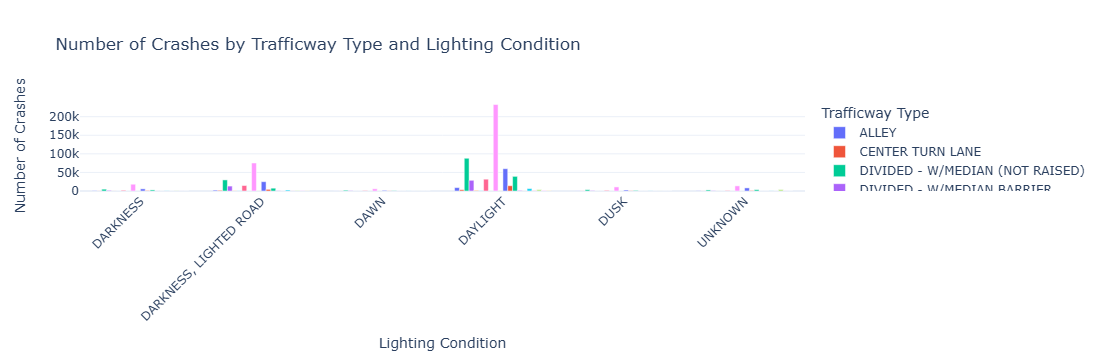

In [58]:
# Grouping by 'TRAFFICWAY_TYPE' and 'LIGHTING_CONDITION' and counting the number of crashes
combined_counts = crashes_df.groupby(['LIGHTING_CONDITION', 'TRAFFICWAY_TYPE']).size().reset_index(name='Number of Crashes')

# Plotting the bar chart with Plotly
fig = px.bar(combined_counts, 
             x='LIGHTING_CONDITION', 
             y='Number of Crashes', 
             color='TRAFFICWAY_TYPE',
             title='Number of Crashes by Trafficway Type and Lighting Condition',
             labels={'TRAFFICWAY_TYPE': 'Trafficway Type', 'Number of Crashes': 'Number of Crashes', 'LIGHTING_CONDITION': 'Lighting Condition'},
             barmode='group',
             template='plotly_white')

fig.update_layout(xaxis_tickangle=-45)  # Rotate x labels for better readability
fig.show()

The majority of crashes occur in daylight, which is likely due to higher traffic volumes during the day.
A significant number of crashes also occur in darkness, especially at not divided street and on one-way streets, highlighting the need for better nighttime visibility and safety measures.
The data suggests that not divided and one-way streets are particularly prone to accidents, irrespective of the lighting conditions.
Measures to enhance safety could focus on these high-risk areas and times, such as improving lighting, signage, and traffic control at intersections and one-way streets.

## [b] Traffic Accidents History


### [i]

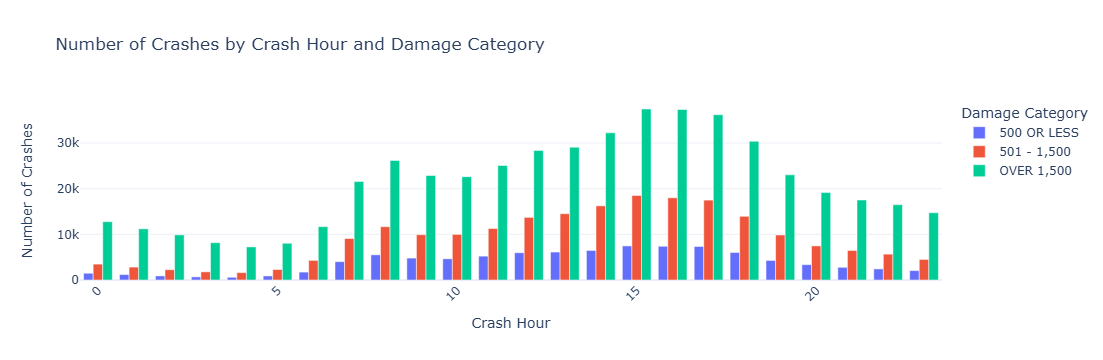

In [59]:
# Grouping by 'CRASH_HOUR' and 'DAMAGE' and counting the number of crashes
combined_counts = crashes_df.groupby(['CRASH_HOUR', 'DAMAGE']).size().reset_index(name='Number of Crashes')

# Plotting the bar chart with Plotly
fig = px.bar(combined_counts, 
             x='CRASH_HOUR', 
             y='Number of Crashes', 
             color='DAMAGE',
             title='Number of Crashes by Crash Hour and Damage Category',
             labels={'CRASH_HOUR': 'Crash Hour', 'Number of Crashes': 'Number of Crashes', 'DAMAGE': 'Damage Category'},
             barmode='group',
             template='plotly_white')

fig.update_layout(xaxis_tickangle=-45)  # Rotate x labels for better readability
fig.show()

The highest number of crashes occurs between 12 PM and 6 PM, with a noticeable peak around 3 PM to 5 PM.
These hours likely correspond to high traffic volumes due to lunchtime and evening rush hours.
Fewer crashes occur during the early morning hours (12 AM to 5 AM), which could be due to lower traffic volumes during these times.
Crashes resulting in higher damage costs over 1,500 dollar are more frequent during busy traffic hours, possibly due to higher speeds and congestion leading to more severe collisions.
Lower-cost crashes 500 dollar  or less are less frequent but still follow the general trend of increasing during high traffic periods.

### [ii]

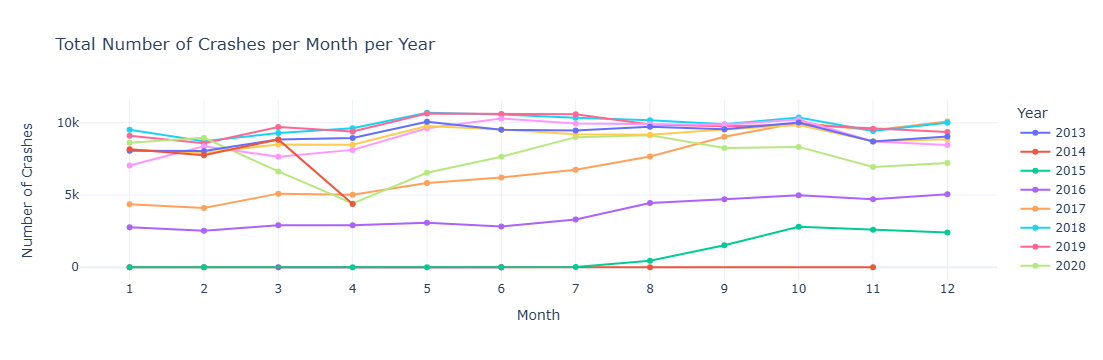

In [60]:
# Grouping by 'CRASH_YEAR' and 'CRASH_MONTH' and counting the number of crashes
monthly_counts = crashes_df.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size().reset_index(name='Number of Crashes')

# Plotting the line chart with Plotly
fig = px.line(monthly_counts, 
              x='CRASH_MONTH', 
              y='Number of Crashes', 
              color='CRASH_YEAR',
              title='Total Number of Crashes per Month per Year',
              labels={'CRASH_MONTH': 'Month', 'Number of Crashes': 'Number of Crashes', 'CRASH_YEAR': 'Year'},
              markers=True,
              template='plotly_white')

fig.update_layout(xaxis=dict(tickmode='linear', tick0=1, dtick=1))  # Ensure x-axis ticks for each month
fig.show()

There is a slight increase in crashes during the summer months (June to August) for most years.
The data for 2020 shows an unusual trend, starting with very low crash numbers and increasing towards the end of the year. This could be due to the impact of the COVID-19 pandemic, which led to changes in traffic patterns and reduced travel during certain periods.
The chart indicates that while there are some fluctuations, the overall number of crashes remains relatively consistent throughout the years with minor seasonal variations.

### [iii]

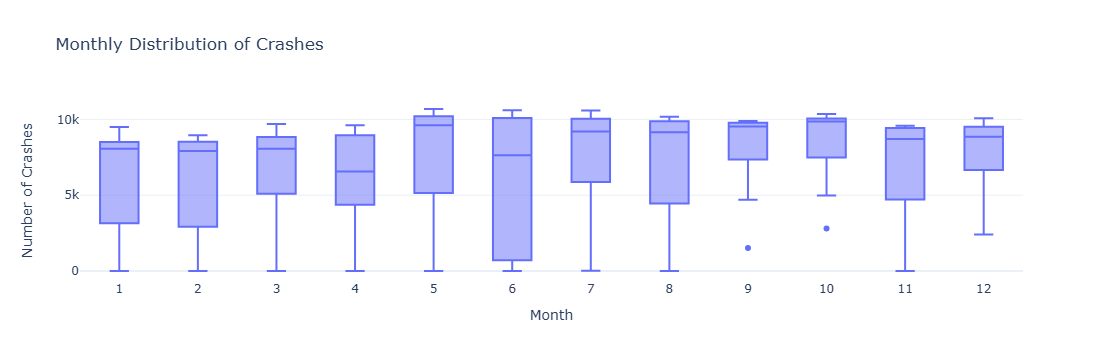

In [61]:
# Grouping by 'CRASH_YEAR' and 'CRASH_MONTH' and counting the number of crashes
monthly_counts = crashes_df.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size().reset_index(name='Number of Crashes')

# Plotting the box plot with Plotly
fig = px.box(monthly_counts, 
             x='CRASH_MONTH', 
             y='Number of Crashes', 
             title='Monthly Distribution of Crashes',
             labels={'CRASH_MONTH': 'Month', 'Number of Crashes': 'Number of Crashes'},
             template='plotly_white')

fig.update_layout(xaxis=dict(tickmode='linear', tick0=1, dtick=1))  # Ensure x-axis ticks for each month
fig.show()

The number of crashes tends to vary monthly, with most months showing a wide IQR, indicating a substantial variation in crash counts.
June has the widest IQR, indicating significant variability in the number of crashes.
Other months with noticeable variability include March, May, and July.
The median number of crashes is relatively consistent across months, generally ranging between 5,000 and 7,000 crashes.
May and July show slightly higher medians compared to other months.
There are a few outliers in months like September and October, indicating some years had significantly lower crash counts during these months.

### [iv]

In [ ]:
# Grouping by 'CRASH_DAY_OF_WEEK' and 'DAMAGE' and counting the number of crashes
grouped_data = crashes_df.groupby(['CRASH_DAY_OF_WEEK', 'DAMAGE']).size().reset_index(name='Number of Crashes')

# Plotting the Sunburst chart with Plotly
fig = px.sunburst(grouped_data, 
                  path=['CRASH_DAY_OF_WEEK', 'DAMAGE'], 
                  values='Number of Crashes',
                  title='Number of Crashes by Day of the Week and Damage Category',
                  labels={'CRASH_DAY_OF_WEEK': 'Day of the Week', 'DAMAGE': 'Damage Category'},
                  template='plotly_white')
fig.update_layout(width=600, height=600)

fig.show()

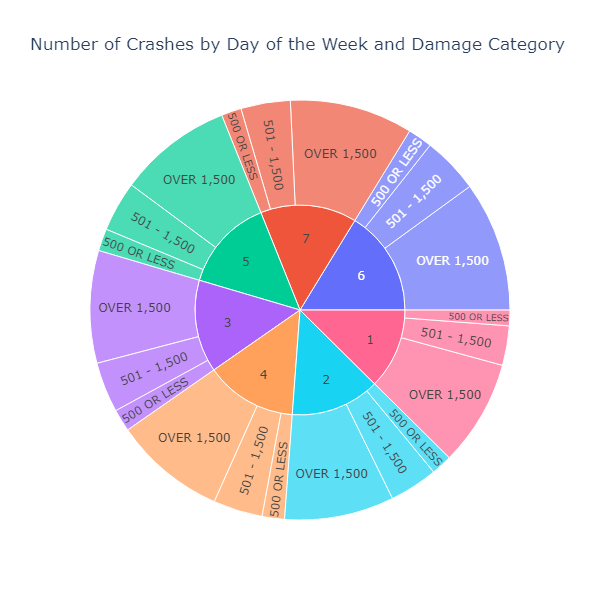

In [153]:
image_path = "images/num_crashes_by_day_and_damage.png" 
display(Image(filename=image_path))

The chart highlights a clear pattern where the number of crashes increases towards the weekend, particularly on Fridays and Saturdays.
Crashes with higher damage costs are more prevalent, suggesting that more severe crashes are common.

## [c] Spatial Analysis


### [i]

In [ ]:
# Group by the geohash and count the number of crashes
geohash_counts = crashes_df['GEOHASH'].value_counts().reset_index()
geohash_counts.columns = ['Geohash', 'Number of Crashes']

# Filter geohashes with counts greater than 400
geohash_counts_filtered = geohash_counts[geohash_counts['Number of Crashes'] >= 250]

# Plotting the bar chart with Plotly
fig = px.bar(geohash_counts_filtered, 
             x='Geohash', 
             y='Number of Crashes', 
             title='Number of Crashes in Each Geographical Sector (Counts > 250)', 
             labels={'Geohash': 'Geohash', 'Number of Crashes': 'Number of Crashes'})

fig.update_layout(xaxis={'categoryorder':'total descending'}, template='plotly_white')

# Show the plot
fig.show()

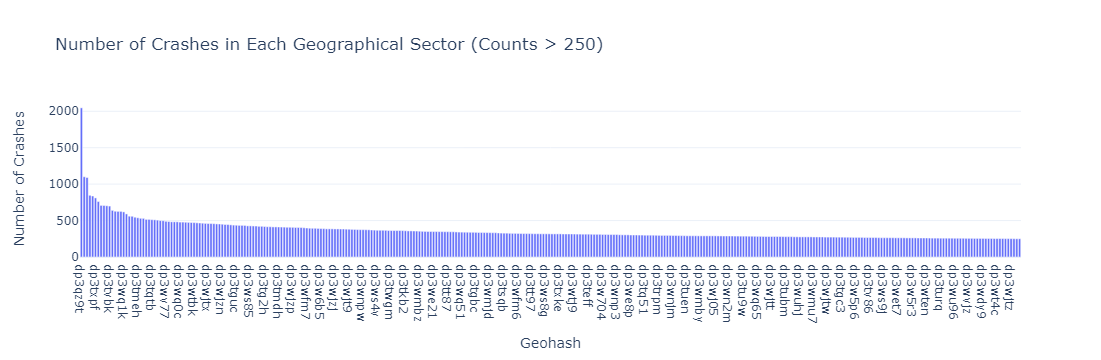

In [152]:
image_path = "images/number_of_crashes_in_each_sector.png" 
display(Image(filename=image_path))

### [ii]

In [ ]:
# Plotting the box plot with Plotly
filtered_df = crashes_df[['DAMAGE', 'DISTANCE_TO_CBD']]
fig = px.box(filtered_df, 
             x='DAMAGE', 
             y='DISTANCE_TO_CBD',  
             title='Distance to CBD by Damage Category',
             labels={'DAMAGE': 'Damage Category', 'DISTANCE_TO_CBD': 'Distance to CBD (meters)'}, 
             template='plotly_white')

# Show the plot
fig.show()

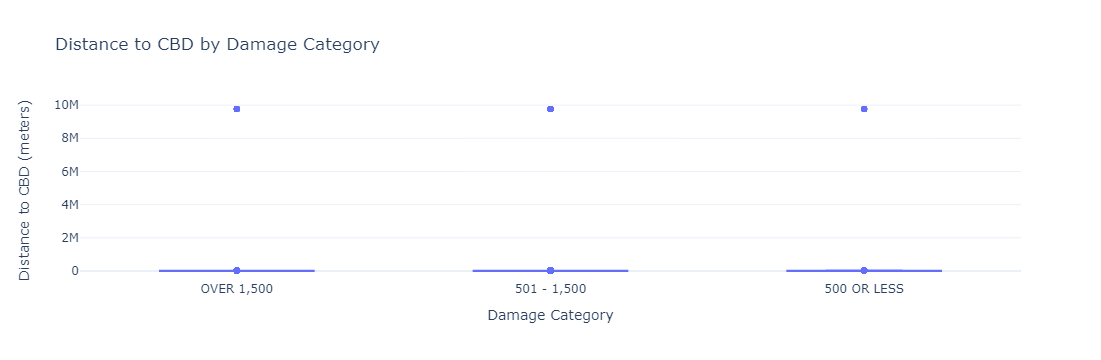

In [150]:
image_path = "images/distance_to_cbd_by_damage.png" 
display(Image(filename=image_path))

### [iii]

In [ ]:
filtered_df = crashes_df[['LENGTH_KM', 'DAMAGE']]

# Plotting the box plot with Plotly
fig = px.box(filtered_df, 
             # x='DAMAGE', 
             y='LENGTH_KM', 
             title='Street Length within City by Damage Category',
             labels={'DAMAGE': 'Damage Category', 'LENGTH_KM': 'Street Length (km)'}, 
             template='plotly_white')

# Show the plot
fig.show()

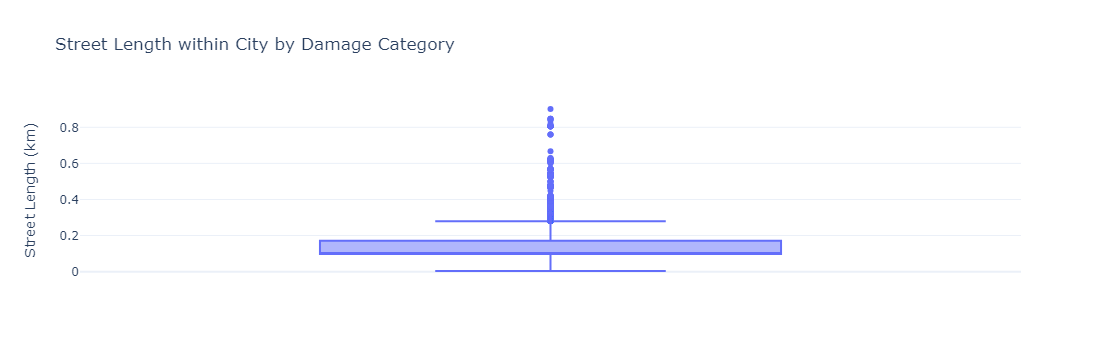

In [149]:
image_path = "images/street_len_within_city_by_damage.png" 
display(Image(filename=image_path))

we notice that most street are 0.1 km or less and most of the datat is less than 0.2 km

### [iv]

In [ ]:
length_category_counts = crashes_df['LENGTH_CATEGORY'].value_counts().reset_index()
length_category_counts.columns = ['LENGTH_CATEGORY', 'CRASH_COUNT']
 
fig = px.bar(
    length_category_counts,
    x='LENGTH_CATEGORY',
    y='CRASH_COUNT',
    title='Number of Traffic Crashes by Street Length Category',
    labels={'LENGTH_CATEGORY': 'Street Length Category', 'CRASH_COUNT': 'Number of Crashes'},
    height=600
)
fig.show()

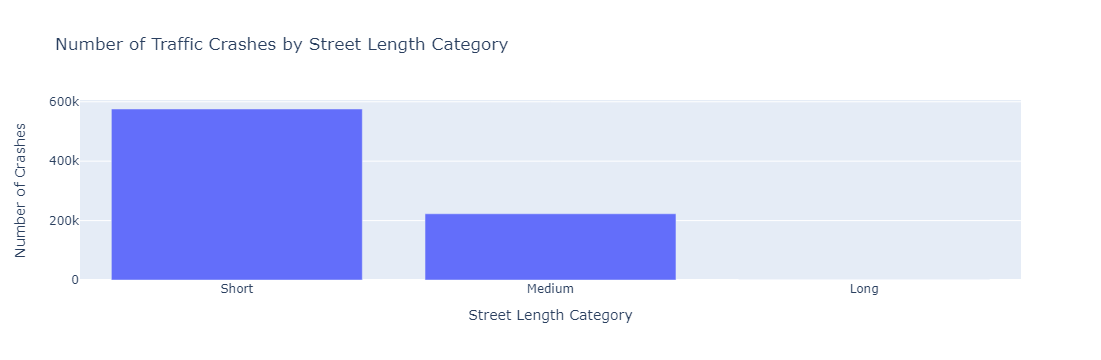

In [132]:
image_path = "images/num_traffic_crashes_street_length.png" 
display(Image(filename=image_path))

we notice that most accidents happen in short distences 

### [v]

In [ ]:
distance_category_counts = crashes_df['DISTANCE_CATEGORY'].value_counts().reset_index()
distance_category_counts.columns = ['DISTANCE_CATEGORY', 'CRASH_COUNT']
 
fig = px.bar(distance_category_counts, x='DISTANCE_CATEGORY', y='CRASH_COUNT', 
             labels={'DISTANCE_CATEGORY': 'Distance Category from CBD', 'CRASH_COUNT': 'Number of Crashes'},
             title='Number of Traffic Crashes by Distance Category from CBD')

fig.show()

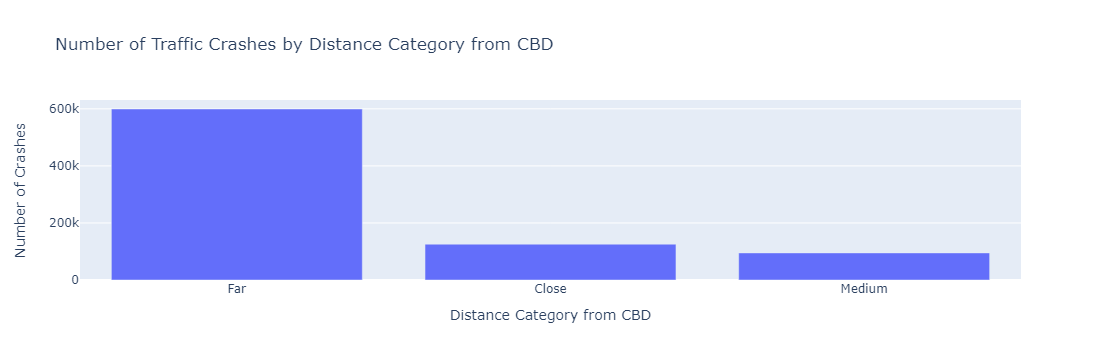

In [131]:
image_path = "images/num_traffic_crashes_cbd.png" 
display(Image(filename=image_path))

we notice that the majority of accidents happend far from the CBD

### [vi]

In [94]:
if 'LENGTH_CATEGORY' not in crashes_df.columns or 'DISTANCE_CATEGORY' not in crashes_df.columns:
    raise ValueError("البيانات المفقودة: الأعمدة 'LENGTH_CATEGORY' و 'DISTANCE_CATEGORY' غير موجودة في البيانات")

contingency_table = pd.crosstab(crashes_df['LENGTH_CATEGORY'], crashes_df['DISTANCE_CATEGORY'])
 
print("Contingency Table:")
print(contingency_table)
 
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
 
print(f"\nChi-Square Test Result:\nChi2: {chi2}\nP-value: {p}\nDegrees of Freedom: {dof}\nExpected Frequencies: \n{expected}")

Contingency Table:
DISTANCE_CATEGORY   Close  Medium     Far
LENGTH_CATEGORY                          
Short              107778   69214  398611
Medium              15866   23249  183783
Long                    6      46     163

Chi-Square Test Result:
Chi2: 18212.957741775135
P-value: 0.0
Degrees of Freedom: 4
Expected Frequencies: 
[[8.91096597e+04 6.66675739e+04 4.19825766e+05]
 [3.45070559e+04 2.58165244e+04 1.62574420e+05]
 [3.32843589e+01 2.49017611e+01 1.56813880e+02]]


+9
85046Chi2 Value: 18,212.96:
This is the test statistic for the Chi-Square test. A higher value indicates a greater difference between the observed and 
expected frequencies, suggesting a stronger association between the variable

P-value: 0.0:
The p-value indicates the probability of observing the data if the null hypothesis (no association between variables) is true. A p-value of 0.0 (often presented as <0.0001 in some contexts) suggests that there is an extremely low probability that the observed association is due to chance. Therefore, it strongly indicates a significant association between 'LENGTH_CATEGORY' and 'DISTANCE_CATEGORY'.

Degrees of Freedom: 4:
Degrees of freedom for the Chi-Square test are calculated as (number of rows - 1) * (number of columns - 1). Here, it is (3-1) * (3-1) = 4.

The significant difference between the observed and expected frequencies, coupled with the very low p-value, indicates that there is a statistically significant association between 'LENGTH_CATEGORY' and 'DISTANCE_CATEGORY'. This means that the distribution of street lengths is not independent of their distance from the Central Business District. The strong Chi2 value further supports this conclusion, showing that the observed values deviate considerably from what would be expected if there were no association.

## [d] Passengers Cases Analysis


### [i]

In [ ]:
# Merging the data
merged_df = crashes_df.merge(crashes_vehicles_df, on='CRASH_RECORD_ID').merge(crashes_people_df, on='CRASH_RECORD_ID')

# Calculating vehicle age
merged_df['VEHICLE_AGE'] = crashes_df['CRASH_YEAR'] - crashes_vehicles_df['VEHICLE_YEAR']

# Dropping missing values
merged_df.dropna(subset=['AGE', 'SEX', 'VEHICLE_AGE'], inplace=True)

# Creating the scatter plot
fig = px.scatter(
    merged_df,
    x='AGE',
    y='VEHICLE_AGE',
    color='SEX',
    labels={'AGE': 'AGE', 'VEHICLE_AGE': 'VEHICLE_AGE', 'SEX': 'SEX'},
    title='Scatter Plot of Driver Age, Driver Gender, and Vehicle Age at Crash Date'
)
fig.show()

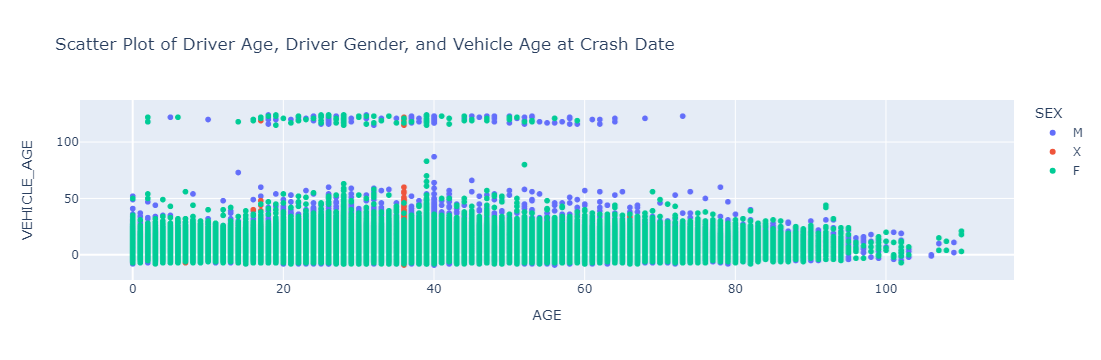

In [123]:
image_path = "images/age_sex_scatter.png" 
display(Image(filename=image_path))

There is a higher concentration of drivers in the age range of approximately 20 to 60 years.
There seems to be a higher concentration of newer vehicles, especially around the 0 to 20 years range.
The distribution of vehicle ages does not seem to show a significant difference between male and female drivers.

### [ii]

In [128]:
# Filter rows where VEHICLE_YEAR is not equal to 0
crashes_vehicles_df = crashes_vehicles_df[crashes_vehicles_df['VEHICLE_YEAR'] != 0]

# Calculate vehicle age
crashes_vehicles_df['VEHICLE_AGE'] = crashes_vehicles_df['CRASH_YEAR'] - crashes_vehicles_df['VEHICLE_YEAR']

# Classify vehicle ages
vehicle_age_bins = [0, 5, 10, 15, 20, np.inf]
vehicle_age_labels = ['0-5', '6-10', '11-15', '16-20', '21+']
crashes_vehicles_df['VEHICLE_AGE_GROUP'] = pd.cut(crashes_vehicles_df['VEHICLE_AGE'], bins=vehicle_age_bins, labels=vehicle_age_labels)

# Classify driver ages
driver_age_bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
driver_age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
crashes_people_df['DRIVER_AGE_GROUP'] = pd.cut(crashes_people_df['AGE'], bins=driver_age_bins, labels=driver_age_labels)

# Merge data using common identifier
merged_df = pd.merge(crashes_vehicles_df, crashes_people_df, on='CRASH_RECORD_ID')

# Create contingency table
contingency_table = pd.crosstab(merged_df['VEHICLE_AGE_GROUP'], merged_df['DRIVER_AGE_GROUP'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square: 14937.441871218945
P-value: 0.0
Degrees of Freedom: 24
Expected Frequencies:
[[ 68168.91804864 130941.10212358 283240.01542272 381353.32931494
  114883.83727807  84365.51117533  52058.28663672]
 [ 64909.37543807 124680.06536276 269696.7038121  363118.66369063
  109390.58942269  80331.51758395  49569.0846898 ]
 [ 51166.77941273  98282.83446769 212596.58807625 286239.27499395
   86230.44238285  63323.74964892  39074.33101762]
 [ 22544.7366663   43304.67243245  93672.77263382 126120.68127716
   37994.23451022  27901.253058    17216.64942205]
 [  6531.19043427  12545.32561352  27136.92005512  36537.05072332
   11006.89640617   8082.9685338    4987.64823381]]


Chi-Square: 14937.441871218945/:
The Chi-Square statistic is a measure of how much the observed counts in the contingency table deviate from the expected counts if the variables were independent.
A large Chi-Square value indicates a greater difference between the observed and expected frequencies.

P-value: 0.0:
The P-value indicates the probability of observing a Chi-Square statistic as extreme as, or more extreme than, the one calculated, assuming that the null hypothesis is true.
A P-value of 0.0 suggests that the observed data is highly unlikely under the null hypothesis of independence between vehicle age groups and driver age groups. This indicates a significant association between these variables.

Degrees of Freedom: 24;
Degrees of Freedom (dof) are calculated as (number of rows - 1) * (number of columns - 1) in the contingency table.
In this case, the contingency table has 5 vehicle age groups and 7 driver age groups, resulting in (5-1) * (7-1) = 24 degrees of freedom.

### [iii]

In [ ]:
# Filtering out the drivers and getting the average passenger age
passenger_age = passengers_df[passengers_df['PERSON_TYPE'] != 'Driver']['AVERAGE_PASSENGER_AGE']

# Creating the box plot using Plotly
fig = go.Figure()

fig.add_trace(go.Box(
    y=passenger_age,
    name="Average Passenger Age",
    marker_color='blue'
))

fig.update_layout(
    title="Box plot of Average Passenger Age excluding Drivers",
    yaxis_title="Average Passenger Age"
)

fig.show()

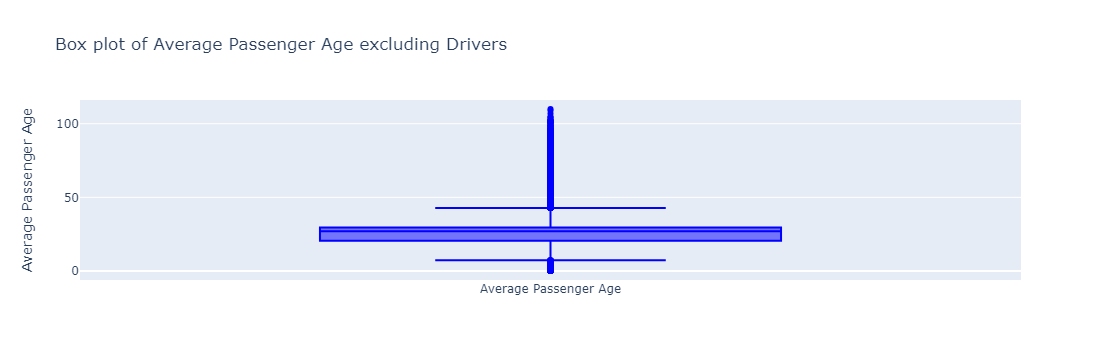

In [139]:
image_path = "images/ave_passenger_age_no_drivers.png" 
display(Image(filename=image_path))

The plot indicates that the median average passenger age is approximately in the mid-30s.
The majority of the average passenger ages are concentrated within the IQR range, which is around 28 to 42.5 years.
The presence of outliers suggests that there are some cases with notably higher or lower average passenger ages, which could be due to a variety of factors such as different demographics in specific crashes.

### [iv]

In [ ]:
passenger_age = passengers_df[passengers_df['PERSON_TYPE'] != 'Driver']['AVERAGE_PASSENGER_COUNT']

# Creating the box plot using Plotly
fig = go.Figure()

fig.add_trace(go.Box(
    y=passenger_age,
    name="Average Passenger Count",
    marker_color='blue'
))

fig.update_layout(
    title="Box plot of Average Passenger Count excluding Drivers",
    yaxis_title="Average Passenger Count"
)

fig.show()

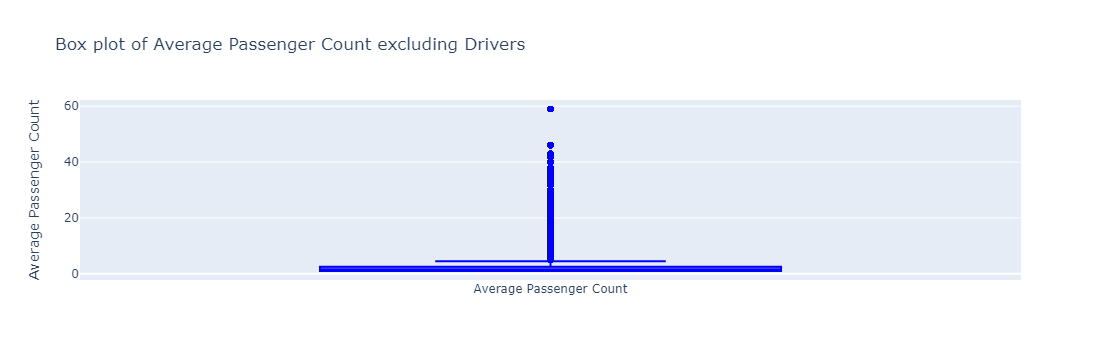

In [142]:
image_path = "images/avg_passenger_count_no_drivers.png" 
display(Image(filename=image_path))

The plot indicates that the typical vehicle involved in a crash has an average passenger count close to zero, reflecting a common scenario where vehicles may not be fully occupied.
The IQR is very narrow, reinforcing the idea that most vehicles have a similar, low average passenger count.
The presence of outliers suggests that there are occasional instances with much higher passenger counts. These outliers could be due to incidents involving larger vehicles or unusual circumstances.

### [v]

In [ ]:
vehicle_age_binned_distribution = crashes_vehicles_df['VEHICLE_AGE_CATEGORY'].value_counts().sort_index()

# Plotting the bar chart using Plotly
fig = px.bar(
    vehicle_age_binned_distribution,
    x=vehicle_age_binned_distribution.index,
    y=vehicle_age_binned_distribution.values,
    title='Distribution of Vehicle Age Groups',
    labels={'index': 'Vehicle Age Group', 'y': 'Frequency'},
    color=vehicle_age_binned_distribution.values,
    color_continuous_scale='Blues'
)

fig.update_layout(
    xaxis_title='Vehicle Age Group',
    yaxis_title='Frequency',
    xaxis=dict(tickmode='linear')
)

fig.show()

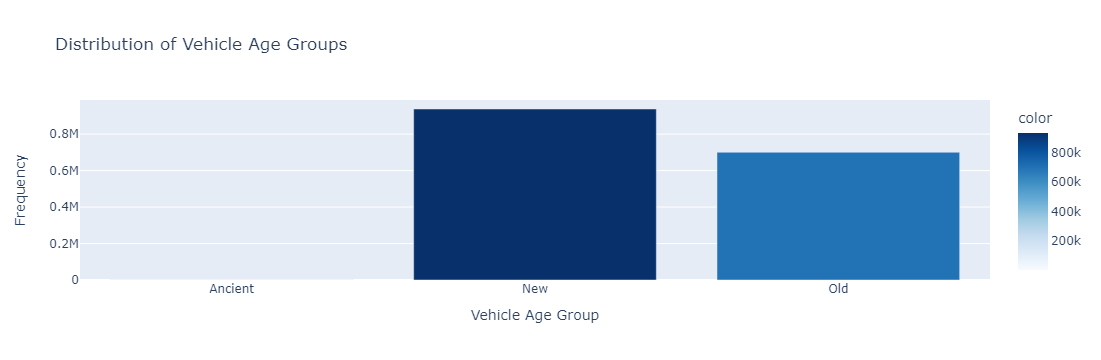

In [158]:
image_path = "images/distribution_vehicle_age_group.png" 
display(Image(filename=image_path))

The majority of vehicles involved in the data set are relatively new (0-10 years old), making up the largest portion of the sample.
As vehicle age increases beyond 10 years, the frequency of vehicles in crashes declines.
This trend could indicate that older vehicles are either less likely to be involved in crashes or simply less prevalent on the roads.
The very low frequency of vehicles older than 21 years suggests that such vehicles are either rare or not often involved in crashes.

## [e] Outlier Detection

### [i]

# Question [4]: Do What you Have to Do

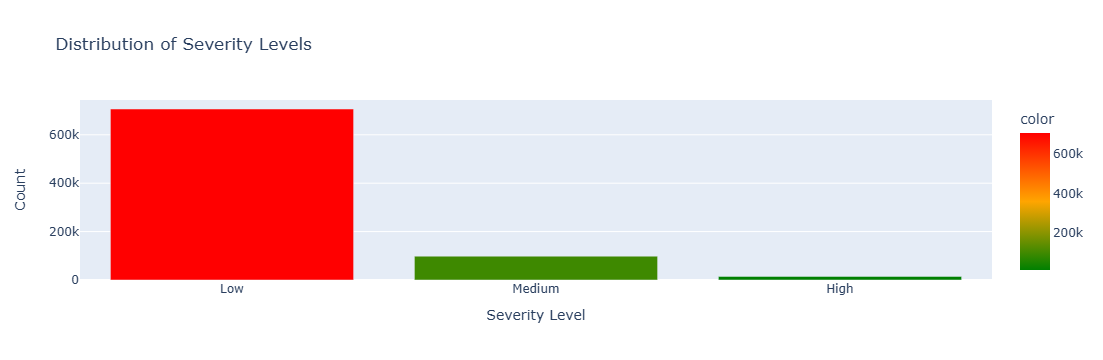

In [165]:
# Define a function to classify severity level
def classify_severity(row):
    if row['INJURIES_FATAL'] > 0:
        return 'High'
    elif row['INJURIES_INCAPACITATING'] > 0:
        return 'High'
    elif row['INJURIES_NON_INCAPACITATING'] > 0:
        return 'Medium'
    elif row['INJURIES_REPORTED_NOT_EVIDENT'] > 0:
        return 'Medium'
    return 'Low'

# Apply the function to the DataFrame
crashes_df['SEVERITY_LEVEL'] = crashes_df.apply(lambda row: classify_severity(row), axis=1)

# Display the distribution of severity levels
severity_counts = crashes_df['SEVERITY_LEVEL'].value_counts()

# Plot a bar chart of SEVERITY_LEVEL using Plotly
fig = px.bar(
    severity_counts,
    x=severity_counts.index,
    y=severity_counts.values,
    title='Distribution of Severity Levels',
    labels={'index': 'Severity Level', 'y': 'Count'},
    color=severity_counts.values,
    color_continuous_scale=['green', 'orange', 'red']
)

fig.update_layout(
    xaxis_title='Severity Level',
    yaxis_title='Count',
    xaxis=dict(tickmode='linear')
)

fig.show()

Low Severity: The Low severity level has the highest count of crashes. This might include crashes with minor or no injuries.
Medium Severity: The Medium severity level has a significantly lower count compared to Low.
High Severity: The High severity level has the lowest count, representing the most severe crashes (fatal or incapacitating injuries).

The high count of Low severity crashes might suggest that many accidents result in minor or no injuries.
The lower counts of Medium and High severity crashes indicate that severe injuries or fatalities are less common.